In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw6.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 6: Clustering
### Associated lectures: Lectures 15 and 16

**Due date: Check the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html)**

## Imports <a name="im"></a>

In [2]:
import os
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

%matplotlib inline
pd.set_option("display.max_colwidth", 0)

<br><br><br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
## Submission instructions
<hr>
rubric={points:6}

**Please be aware that this homework assignment requires installation of several packages in your course environment. It's possible that you'll encounter installation challenges, which might be frustrating. However, remember that solving these issues is not wasting time but it is an essential skill for anyone aspiring to work in data science or machine learning.**

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023W1/blob/main/docs/homework_instructions.md). 

**You may work in a group on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 4. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).


When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission.
4. Make sure that the plots and output are rendered properly in your submitted file. 
5. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb. If the pdf or html also fail to render on Gradescope, please create two files for your homework: hw6a.ipynb with Exercise 1 and hw6b.ipynb with Exercises 2 and 3 and submit these two files in your submission.  
</div>

_Points:_ 6

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 1: Document clustering warm-up
<hr>

In this homework, we will explore a popular application of clustering called [**document clustering**](https://en.wikipedia.org/wiki/Document_clustering). A large amount of unlabeled text data is available out there (e.g., news, recipes, online Q&A, tweets), and clustering is a commonly used technique to organize this data in a meaningful way. 

As a warm up, in this exercise you will cluster sentences from a toy corpus. Later in the homework you will work with a real corpus. 

The code below extracts introductory sentences of Wikipedia articles on a set of queries. To run the code successfully, you will need the `wikipedia` package installed in the course environment. 

```
conda activate cpsc330
conda install -c conda-forge wikipedia
```


**Your tasks:**

Run the code below which 
- extracts content of Wikipedia articles on a set of queries
- tokenizes the text (i.e., separates sentences) and 
- stores the 2nd sentence in each article as a document representing that article

> Feel free to experiment with Wikipedia queries of your choice. But stick to the provided list for the final submission so that it's easier for the TAs to grade your submission.

> For tokenization we are using the `nltk` package. If you do not have this package in the course environment, you will have to install it.

```
conda activate cpsc330
conda install -c anaconda nltk
```

Even if you have the package installed via the course `conda` environment, you might have to download `nltk` pre-trained models, which can be done with the code below.

In [3]:
import nltk

nltk.download("punkt")
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lesle\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lesle\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
import wikipedia
from nltk.tokenize import sent_tokenize, word_tokenize

queries = [
    "Artificial Intelligence", "Deep learning", "Unsupervised learning", "Quantum Computing", 
    "Environmental protection", "Climate Change", "Renewable Energy", "Biodiversity",
    "French Cuisine", "Bread food", "Dumpling food"
]

wiki_dict = {"wiki query": [], "text": [], "n_words": []}
for i in range(len(queries)):
    text = sent_tokenize(wikipedia.page(queries[i]).content)[1]
    wiki_dict["text"].append(text)
    wiki_dict["n_words"].append(len(word_tokenize(text)))
    wiki_dict["wiki query"].append(queries[i])

wiki_df = pd.DataFrame(wiki_dict)
wiki_df

,wiki query,text,n_words
0,Artificial Intelligence,It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.,40
1,Deep learning,"The field takes inspiration from biological neuroscience and is centered around stacking artificial neurons into layers and ""training"" them to process data.",25
2,Unsupervised learning,"The training data is processed, building a function that maps new data to expected output values.",18
3,Quantum Computing,"On small scales, physical matter exhibits properties of both particles and waves, and quantum computing leverages this behavior using specialized hardware.",24
4,Environmental protection,"Its objectives are to conserve natural resources and the existing natural environment and, where it is possible, to repair damage and reverse trends.",26
5,Climate Change,Climate change in a broader sense also includes previous long-term changes to Earth's climate.,16
6,Renewable Energy,"The most widely used renewable energy types are solar energy, wind power, and hydropower.",17
7,Biodiversity,It can be measured on various levels.,8
8,French Cuisine,"In the 14th century, Guillaume Tirel, a court chef known as ""Taillevent"", wrote Le Viandier, one of the earliest recipe collections of medieval France.",31
9,Bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20


Our toy corpus has six toy documents (`text` column in the dataframe) extracted from Wikipedia queries. 

<br><br>

<!-- BEGIN QUESTION -->

### 1.1 How many clusters? 
rubric={points}


**Your tasks:**

1. If you are asked to cluster the documents from this toy corpus manually, how many clusters would you identify and how would you label each cluster?   

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 1

I would label the clusters by topic, and I see 3 clusters:
- Computer Science: "Artificial Intelligence", "Deep learning", "Unsupervised learning", "Quantum Computing"
- Environment: "Environmental protection", "Climate Change", "Renewable Energy", "Biodiversity"
- Food: "French Cuisine", "Bread food", "Dumpling food"

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.2 `KMeans` with bag-of-words representation 
rubric={points}

In the lecture, we saw that data representation plays a crucial role in clustering. Changing flattened representation of images to feature vectors extracted from pre-trained models greatly improved the quality of clustering. 

What kind of representation is suitable for text data? We have used bag-of-words representation to numerically encode text data before, where each document is represented with a vector of word frequencies. 

Let's try clustering documents with this simplistic representation.  

**Your tasks:**

1. Create bag-of-words representation using [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) with default arguments for the `text` column in `wiki_df` above.
2. Cluster the encoded documents with [`KMeans` clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Use `random_state=42` (for reproducibility) and set `n_clusters` to the number you identified in the previous exercise.
3. Store the clustering labels in `kmeans_bow_labels` variable below. 

<div class="alert alert-warning">

Solution_1.2
    
</div>

_Points:_ 4

In [5]:
vec = CountVectorizer()
X_counts = vec.fit_transform(wiki_df["text"])
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_counts)

KMeans(n_clusters=3, random_state=42)

In [6]:
kmeans_bow_labels = kmeans.labels_
kmeans_bow_labels

array([2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [7]:
wiki_df["bow_kmeans"] = kmeans_bow_labels
wiki_df

,wiki query,text,n_words,bow_kmeans
0,Artificial Intelligence,It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.,40,2
1,Deep learning,"The field takes inspiration from biological neuroscience and is centered around stacking artificial neurons into layers and ""training"" them to process data.",25,1
2,Unsupervised learning,"The training data is processed, building a function that maps new data to expected output values.",18,1
3,Quantum Computing,"On small scales, physical matter exhibits properties of both particles and waves, and quantum computing leverages this behavior using specialized hardware.",24,1
4,Environmental protection,"Its objectives are to conserve natural resources and the existing natural environment and, where it is possible, to repair damage and reverse trends.",26,0
5,Climate Change,Climate change in a broader sense also includes previous long-term changes to Earth's climate.,16,1
6,Renewable Energy,"The most widely used renewable energy types are solar energy, wind power, and hydropower.",17,1
7,Biodiversity,It can be measured on various levels.,8,1
8,French Cuisine,"In the 14th century, Guillaume Tirel, a court chef known as ""Taillevent"", wrote Le Viandier, one of the earliest recipe collections of medieval France.",31,1
9,Bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.3 Sentence embedding representation
rubric={points}

Bag-of-words representation is limited in that it does not take into account word ordering and context. There are other richer and more expressive representations of text which can be extracted using transfer learning. In this lab, we will use one such representation called sentence embedding representation, which uses deep learning models to generate dense, fixed-length vector representations for sentences. We will extract such representations using sentence transformer package. Sentence embedding takes into account context of words and semantic meaning of sentences and it is likely to work better when we are interested in clustering sentences based on their semantic similarity. 

```
conda activate cpsc330
conda install pytorch::pytorch torchvision torchaudio -c pytorch
conda install -c conda-forge sentence-transformers
```

**Your tasks:**

1. Run the code below to create sentence embedding representation of documents in our toy corpus. 
2. Cluster documents in our toy corpus encoded with this representation (`emb_sents`) and `KMeans` with following arguments: 
    - `random_state=42` (for reproducibility)
    - `n_clusters`=the number of clusters you identified in 1.1
3. Store the clustering labels in `kmeans_emb_labels` variable below. 

In [8]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("paraphrase-distilroberta-base-v1")

c:\Users\lesle\AppData\Local\Programs\Python\Python312\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [9]:
emb_sents = embedder.encode(wiki_df["text"])
emb_sent_df = pd.DataFrame(emb_sents, index=wiki_df.index)
emb_sent_df

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.102875,0.201959,0.044091,0.281749,0.321483,-0.281129,0.042515,0.083172,0.155722,-0.114267,...,0.310223,-0.141897,-0.153256,-0.058627,0.005015,-0.005808,0.630392,-0.023694,-0.071900,-0.115921
1,0.000322,0.428834,0.152298,-0.161278,0.224354,-0.363829,0.110951,0.042096,0.188454,0.188299,...,-0.092609,-0.117086,0.133018,0.207266,-0.395182,0.085347,0.677385,-0.405457,0.092258,-0.100411
2,0.236465,-0.282463,-0.258300,0.300584,0.234605,0.061746,-0.072744,0.045550,0.271853,0.054201,...,0.531341,-0.095102,0.316027,0.170600,-0.213746,0.110625,0.463024,-0.658667,0.246860,0.171115
3,0.276844,0.657946,0.106466,0.290566,0.803929,0.023764,0.136675,-0.030063,0.115825,0.244903,...,0.069148,-0.183727,0.217584,0.140797,-0.216237,0.128014,0.181907,-0.054305,0.131837,-0.016249
4,0.200328,0.157551,0.093484,0.120533,-0.439307,0.148569,-0.003543,-0.211189,-0.006088,-0.102894,...,0.187549,-0.430333,-0.350163,0.251643,0.115400,-0.053312,0.088485,0.307340,0.355386,0.024684
5,0.189106,0.406864,0.172560,0.273776,0.058933,0.224642,-0.056590,-0.242728,0.056221,0.127506,...,0.099107,-0.350095,0.070398,0.469786,0.003972,-0.130359,-0.105738,-0.091219,0.210350,0.072002
6,-0.066224,0.465512,-0.135840,-0.229255,-0.144746,0.013772,-0.122810,-0.172322,-0.278583,0.002542,...,-0.090149,-0.305184,-0.048772,-0.008466,0.145859,-0.153741,0.012771,0.507823,0.239722,0.015132
7,-0.139882,0.207129,-0.127446,0.214821,-0.099096,0.063319,-0.347634,-0.203128,0.325749,0.624156,...,0.311010,-0.036291,0.004326,0.078006,0.321024,-0.180906,0.553141,-0.010740,0.382759,0.032368
8,-0.112771,-0.259073,0.172584,-0.149188,-0.074585,0.222288,-0.213039,0.512004,0.216943,-0.200929,...,0.083372,0.196123,0.030323,-0.308583,0.061457,-0.008511,0.350080,0.456677,-0.352978,-0.053868
9,-0.022418,0.217159,0.022694,0.003616,0.240856,0.358046,-0.053310,-0.328075,0.190012,0.244470,...,0.265413,-0.415594,0.003036,0.052484,0.345947,0.110091,0.405441,0.197791,-0.058254,0.212376


<div class="alert alert-warning">

Solution_1.3
    
</div>

_Points:_ 3

In [10]:
kmeans_emb = KMeans(n_clusters=3, random_state=42)
kmeans_emb.fit(emb_sents)

KMeans(n_clusters=3, random_state=42)

In [11]:
kmeans_emb_labels = kmeans_emb.labels_
kmeans_emb_labels

array([2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 1], dtype=int32)

In [12]:
wiki_df["emb_kmeans"] = kmeans_emb_labels
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans
0,Artificial Intelligence,It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.,40,2,2
1,Deep learning,"The field takes inspiration from biological neuroscience and is centered around stacking artificial neurons into layers and ""training"" them to process data.",25,1,2
2,Unsupervised learning,"The training data is processed, building a function that maps new data to expected output values.",18,1,2
3,Quantum Computing,"On small scales, physical matter exhibits properties of both particles and waves, and quantum computing leverages this behavior using specialized hardware.",24,1,2
4,Environmental protection,"Its objectives are to conserve natural resources and the existing natural environment and, where it is possible, to repair damage and reverse trends.",26,0,0
5,Climate Change,Climate change in a broader sense also includes previous long-term changes to Earth's climate.,16,1,0
6,Renewable Energy,"The most widely used renewable energy types are solar energy, wind power, and hydropower.",17,1,0
7,Biodiversity,It can be measured on various levels.,8,1,2
8,French Cuisine,"In the 14th century, Guillaume Tirel, a court chef known as ""Taillevent"", wrote Le Viandier, one of the earliest recipe collections of medieval France.",31,1,2
9,Bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,1,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.4 DBSCAN with cosine distance  
rubric={points}

Now try [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) on our toy dataset. K-Means is kind of bound to the Euclidean distance because it is based on the notion of means. With `DBSCAN` we can try different distance metrics. In the context of text data, [cosine similarities](https://scikit-learn.org/stable/modules/metrics.html#cosine-similarity) or cosine distances tend to work well. Given vectors $u$ and $v$, the **cosine distance** between the vectors is defined as: 

$$distance_{cosine}(u,v) = 1 - (\frac{u \cdot v}{\left\lVert u\right\rVert_2 \left\lVert v\right\rVert_2})$$


**Your tasks**

1. Cluster documents in our toy corpus encoded with sentence embedding representation (`emb_sents`) and [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html?highlight=dbscan#sklearn.cluster.DBSCAN) with `metric='cosine'`. You will have to set appropriate values for the hyperparamters `eps` and `min_samples` to get meaningful clusters, as default values of these hyperparameters are unlikely to work well on this toy dataset.
2. Store the clustering labels in the `dbscan_emb_labels` variable below. 

<div class="alert alert-warning">

Solution_1.4
    
</div>

_Points:_ 4

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_distances
import mglearn

In [14]:
pd.DataFrame(cosine_distances(emb_sents, emb_sents))

,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,0.483608,0.676333,0.663322,0.660961,0.828208,0.845041,0.782363,1.007789,0.830274,0.944333
1,0.483608,0.000000,0.620317,0.704231,0.830179,1.002102,0.951639,0.847065,0.948744,0.874068,0.912405
2,0.676333,0.620317,0.000000,0.770100,0.886870,0.893742,0.942373,0.787862,0.929239,0.876434,0.950107
3,0.663322,0.704231,0.770100,0.000000,0.898262,0.797496,0.804955,0.727993,0.963528,0.901691,0.942765
4,0.660961,0.830179,0.886870,0.898262,0.000000,0.612161,0.738582,0.850124,1.006931,0.820009,0.998241
5,0.828208,1.002102,0.893742,0.797496,0.612161,0.000000,0.634321,0.851373,0.935528,0.778389,0.901886
6,0.845041,0.951639,0.942373,0.804955,0.738582,0.634321,0.000000,0.919147,1.027308,0.871363,0.895295
7,0.782363,0.847065,0.787862,0.727993,0.850124,0.851373,0.919147,0.000000,0.893345,0.723790,0.874039
8,1.007789,0.948744,0.929239,0.963528,1.006931,0.935528,1.027308,0.893345,0.000000,0.780933,0.927115
9,0.830274,0.874068,0.876434,0.901691,0.820009,0.778389,0.871363,0.723790,0.780933,0.000000,0.557305


In [15]:
dbscan = DBSCAN(metric='cosine', eps=0.63, min_samples=2)
dbscan.fit(emb_sents)
dbscan_emb_labels = dbscan.labels_
dbscan_emb_labels


array([ 0,  0,  0, -1,  1,  1, -1, -1, -1,  2,  2])

In [16]:
wiki_df["emb_dbscan"] = dbscan_emb_labels
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans,emb_dbscan
0,Artificial Intelligence,It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.,40,2,2,0
1,Deep learning,"The field takes inspiration from biological neuroscience and is centered around stacking artificial neurons into layers and ""training"" them to process data.",25,1,2,0
2,Unsupervised learning,"The training data is processed, building a function that maps new data to expected output values.",18,1,2,0
3,Quantum Computing,"On small scales, physical matter exhibits properties of both particles and waves, and quantum computing leverages this behavior using specialized hardware.",24,1,2,-1
4,Environmental protection,"Its objectives are to conserve natural resources and the existing natural environment and, where it is possible, to repair damage and reverse trends.",26,0,0,1
5,Climate Change,Climate change in a broader sense also includes previous long-term changes to Earth's climate.,16,1,0,1
6,Renewable Energy,"The most widely used renewable energy types are solar energy, wind power, and hydropower.",17,1,0,-1
7,Biodiversity,It can be measured on various levels.,8,1,2,-1
8,French Cuisine,"In the 14th century, Guillaume Tirel, a court chef known as ""Taillevent"", wrote Le Viandier, one of the earliest recipe collections of medieval France.",31,1,2,-1
9,Bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,1,1,2


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.5 Hierarchical clustering with sentence embedding representation
rubric={points}

**Your tasks:**

Try hierarchical clustering on `emb_sents`. In particular
1. Create and show a dendrogram with `complete` linkage and `metric='cosine'` on this toy dataset.
2. Create flat clusters using `fcluster` with appropriate hyperparameters and store cluster labels to `hier_emb_labels` variable below.

<div class="alert alert-warning">

Solution_1.5
    
</div>

_Points:_ 3

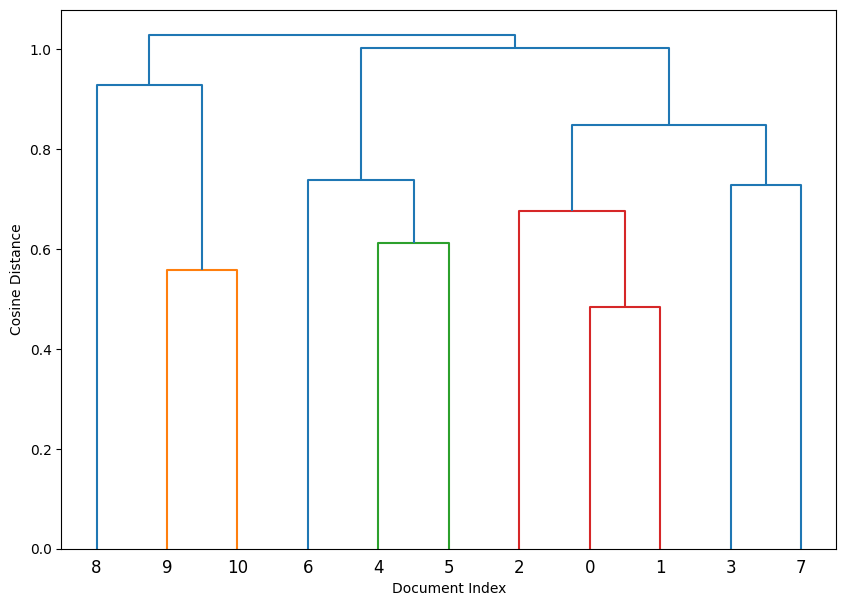

In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

Z = linkage(emb_sents, method='complete', metric='cosine')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.xlabel('Document Index')
plt.ylabel('Cosine Distance')
plt.show()




In [18]:
hier_emb_labels = fcluster(Z, t=3, criterion='maxclust')
hier_emb_labels

array([3, 3, 3, 3, 2, 2, 2, 3, 1, 1, 1], dtype=int32)

In [19]:
wiki_df["emb_hierarchical"] = hier_emb_labels
wiki_df


,wiki query,text,n_words,bow_kmeans,emb_kmeans,emb_dbscan,emb_hierarchical
0,Artificial Intelligence,It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.,40,2,2,0,3
1,Deep learning,"The field takes inspiration from biological neuroscience and is centered around stacking artificial neurons into layers and ""training"" them to process data.",25,1,2,0,3
2,Unsupervised learning,"The training data is processed, building a function that maps new data to expected output values.",18,1,2,0,3
3,Quantum Computing,"On small scales, physical matter exhibits properties of both particles and waves, and quantum computing leverages this behavior using specialized hardware.",24,1,2,-1,3
4,Environmental protection,"Its objectives are to conserve natural resources and the existing natural environment and, where it is possible, to repair damage and reverse trends.",26,0,0,1,2
5,Climate Change,Climate change in a broader sense also includes previous long-term changes to Earth's climate.,16,1,0,1,2
6,Renewable Energy,"The most widely used renewable energy types are solar energy, wind power, and hydropower.",17,1,0,-1,2
7,Biodiversity,It can be measured on various levels.,8,1,2,-1,3
8,French Cuisine,"In the 14th century, Guillaume Tirel, a court chef known as ""Taillevent"", wrote Le Viandier, one of the earliest recipe collections of medieval France.",31,1,2,-1,1
9,Bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,1,1,2,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.6 Discussion
rubric={points}

**Your tasks:**

1. Reflect on and discuss the clustering results of the methods you explored in the previous exercises, focusing on the following points:    
    - effect of input representation on clustering results
    - whether the clustering results match with your intuitions and the challenges associated with getting the desired clustering results with each method

<div class="alert alert-warning">

Solution_1.6
    
</div>

_Points:_ 4

- it looks like each method generally gets progressively better. 
    - starting with kmean clustering using bag of words representation, and this clustering did quite poorly. We forced it to make three clusters, but it really only made 1 big cluster, with 2 separate, single data point clusters. This type of representations probably particularly struggles with having only sentences to compare with, there are not enough words to draw appropriate comparisons. 
    - moving on to using sentence representation, we start to see the clusters forming. Only biodiversity and french cuisine are out of the clusters we would like. Biodiversity makes a lot of sense, I think this one will always be hard because it has a very short sentence, there is very little to go off of. I can sort of see why based on the content of the sentence for french cuisine, it out of the three food queries is most confused with other points. Perhaps the quotations in the text are getting paired with the 'deep learning' query.
    - using DBSCAN was tricky. I was able to find hyperparameters that give 3 clusters, with points in those clusters taht we would expect, but I was not able to get rid of quite a bit of noise/outlier labels. I perhaps could have spent time tuning the parametes more, but I think expecting to get too much better with only 10 items is not realistic. I did print the cosine distances for all points and was able to use that to help me narrow in on a cut off point, but it isn't easy. 
    - finally, using the heirarchical clustering, we see the correct clusters except that 'biodiversity' query, which again, definitely is a very challenging one. I am quite happy with this result. 

- I am quite impressed by the heirarchical method basically getting these categories correct, I find that really neat. I think these methods are quite difficult, I think I having a lack of visualization makes it harder, and I liked the hierarchical method for the dendogram plot as well. 

<br><br>

<!-- BEGIN QUESTION -->

### 1.7 Visualizing clusters
rubric={points:4}


One approach to working with unlabeled data is visualization. That said, our data is high-dimensional, making it challenging to visualize. Take sentence embedding representation as an example: each instance is depicted in 768 dimensions. To visualize such high-dimensional data, we can employ dimensionality reduction techniques to extract the most significant 2 or 3 components, and then visualize this low-dimensional data.

Given data as a `numpy` array and corresponding cluster assignments, the `plot_umap_clusters` function below transforms the data by applying dimensionality reduction technique called [UMAP](https://umap-learn.readthedocs.io/en/latest/) to it and plots the transformed data with different colours for different clusters. 

> *Note: At this point we are using this function only for visualization and you are not expected to understand the UMAP part.* 

You'll have to install the `umap-learn` package in the course conda environment either with `conda` or `pip`, as described in the [documentation](https://umap-learn.readthedocs.io/en/latest/index.html). 

```
> conda activate cpsc330
> conda install -c conda-forge umap-learn
```
or

```
> conda activate cpsc330
> pip install umap-learn 
```

If you get an error with the import below try

```
pip install --upgrade numba umap-learn
```

**Your tasks:**

1. Visualize the clusters created by the methods above using `plot_umap_clusters` function below. In other words, visualize clusters identified by each of the methods below. 
    - K-Means with bag-of-words representation 
    - K-Means with sentence embedding representation
    - DBSCAN with sentence embedding representation 
    - Flat cluster of hierarchical clustering with sentence embedding representation     

In [20]:
import umap

In [21]:
def plot_umap_clusters(
    data,
    cluster_labels,
    raw_sents=wiki_df["text"],
    show_labels=False,
    size=50,
    n_neighbors=15,
    title="UMAP visualization",
    ignore_noise=False,
):
    """
    Carry out dimensionality reduction using UMAP and plot 2-dimensional clusters.

    Parameters
    -----------
    data : numpy array
        data as a numpy array
    cluster_labels : list
        cluster labels for each row in the dataset
    raw_sents : list
        the original raw sentences for labeling datapoints
    show_labels : boolean
        whether you want to show labels for points or not (default: False)
    size : int
        size of points in the scatterplot
    n_neighbors : int
        n_neighbors hyperparameter of UMAP. See the documentation.
    title : str
        title for the visualization plot

    Returns
    -----------
    None. Shows the clusters.
    """

    reducer = umap.UMAP(n_neighbors=n_neighbors, random_state=42)
    Z = reducer.fit_transform(data)  # reduce dimensionality
    umap_df = pd.DataFrame(data=Z, columns=["dim1", "dim2"])
    umap_df["cluster"] = cluster_labels

    if ignore_noise:
        umap_df = umap_df[umap_df["cluster"] != -1]

    labels = np.unique(umap_df["cluster"])

    fig, ax = plt.subplots(figsize=(18, 14))
    ax.set_title(title)

    scatter = ax.scatter(
        umap_df["dim1"],
        umap_df["dim2"],
        c=umap_df["cluster"],
        cmap="tab20b",
        s=size,
        #edgecolors="k",
        #linewidths=0.1,
    )

    legend = ax.legend(*scatter.legend_elements(), loc="best", title="Clusters")
    ax.add_artist(legend)

    if show_labels:
        x = umap_df["dim1"].tolist()
        y = umap_df["dim2"].tolist()
        for i, txt in enumerate(raw_sents):
            ax.annotate(" ".join(txt.split()[:10]), (x[i], y[i]))
    plt.show()

<div class="alert alert-warning">

Solution_1.7
    
</div>

_Points:_ 4

c:\Users\lesle\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\lesle\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


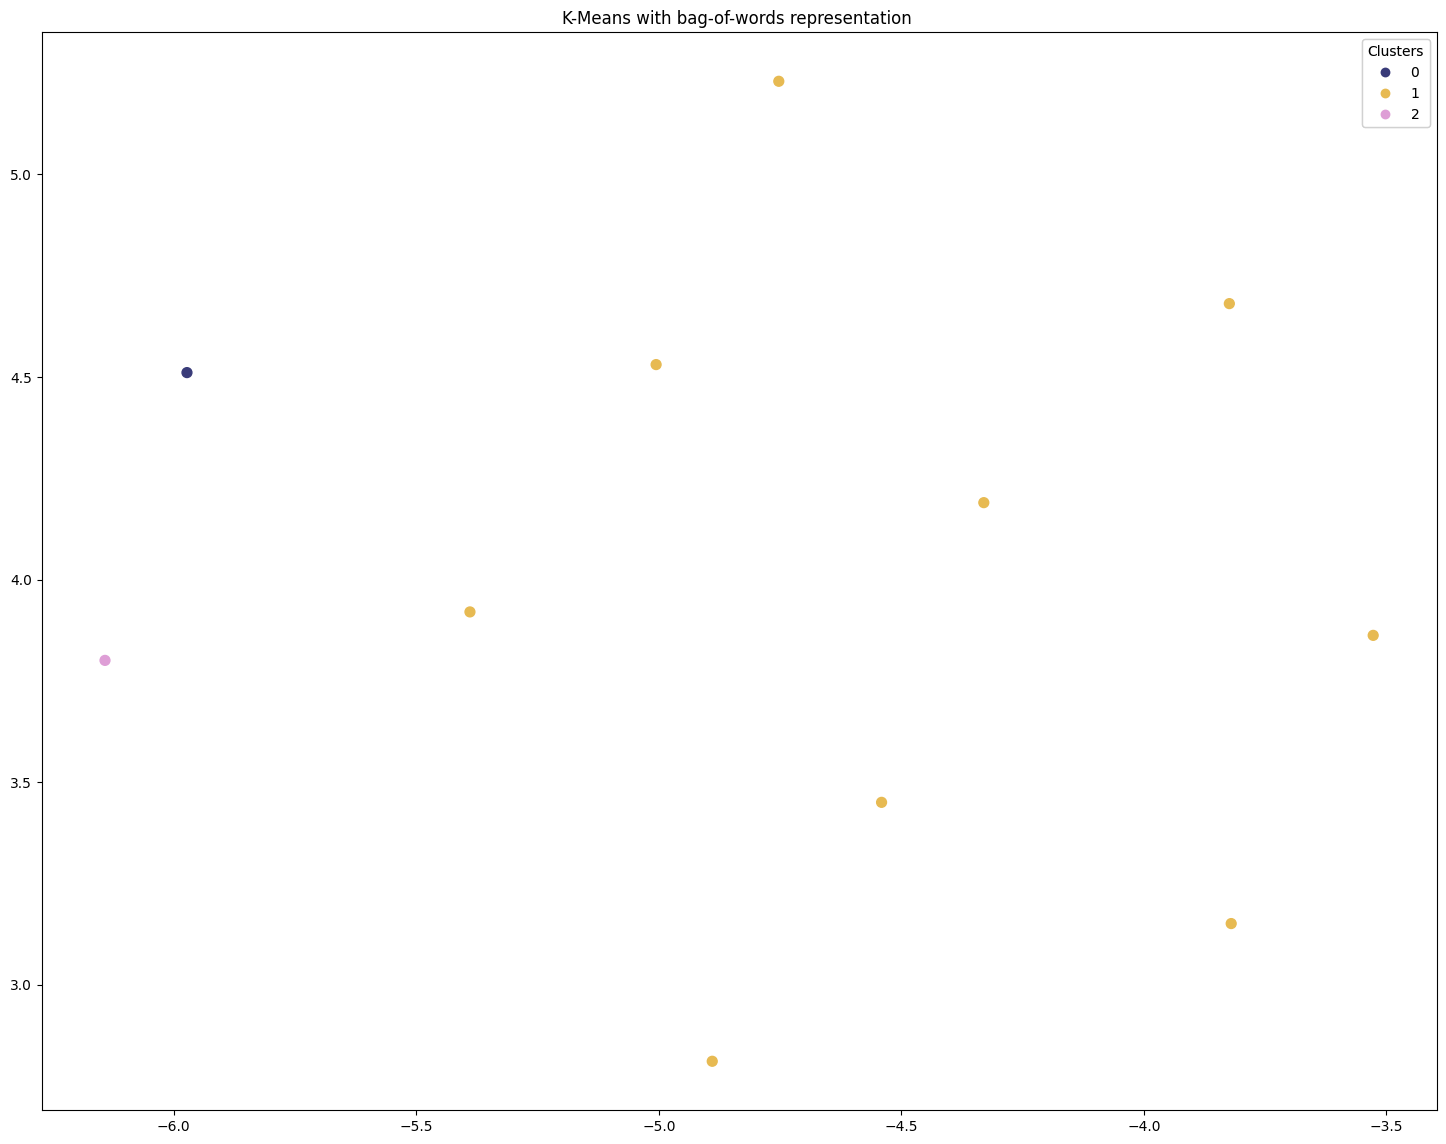

c:\Users\lesle\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\lesle\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


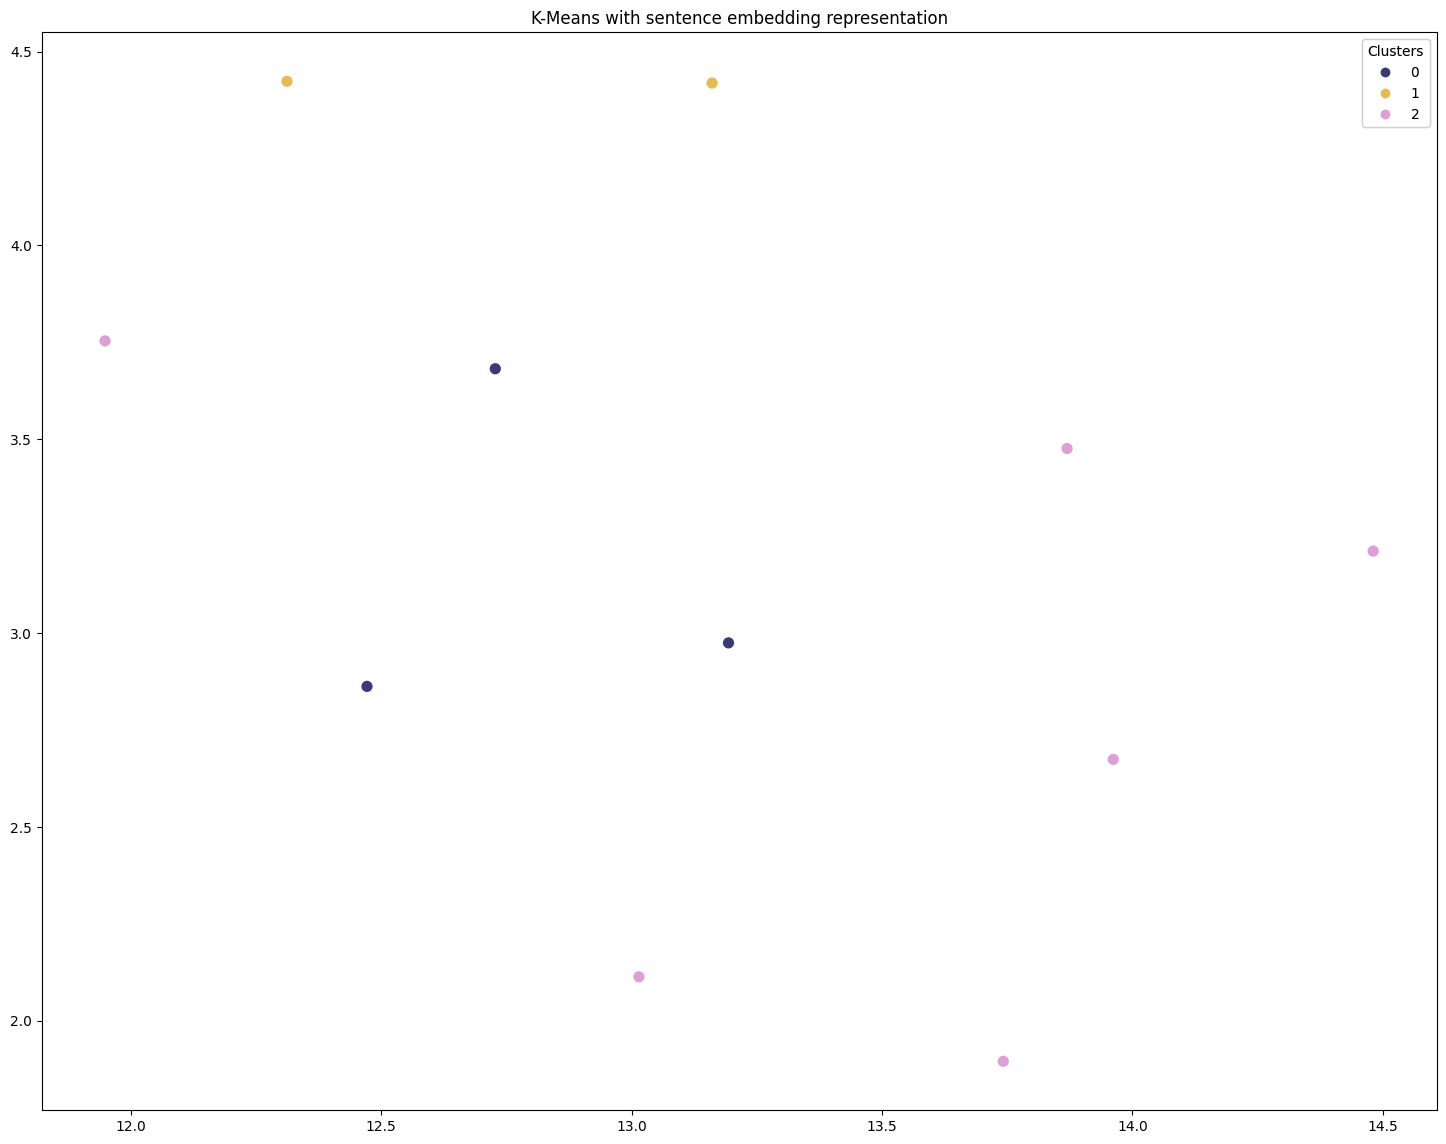

c:\Users\lesle\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\lesle\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


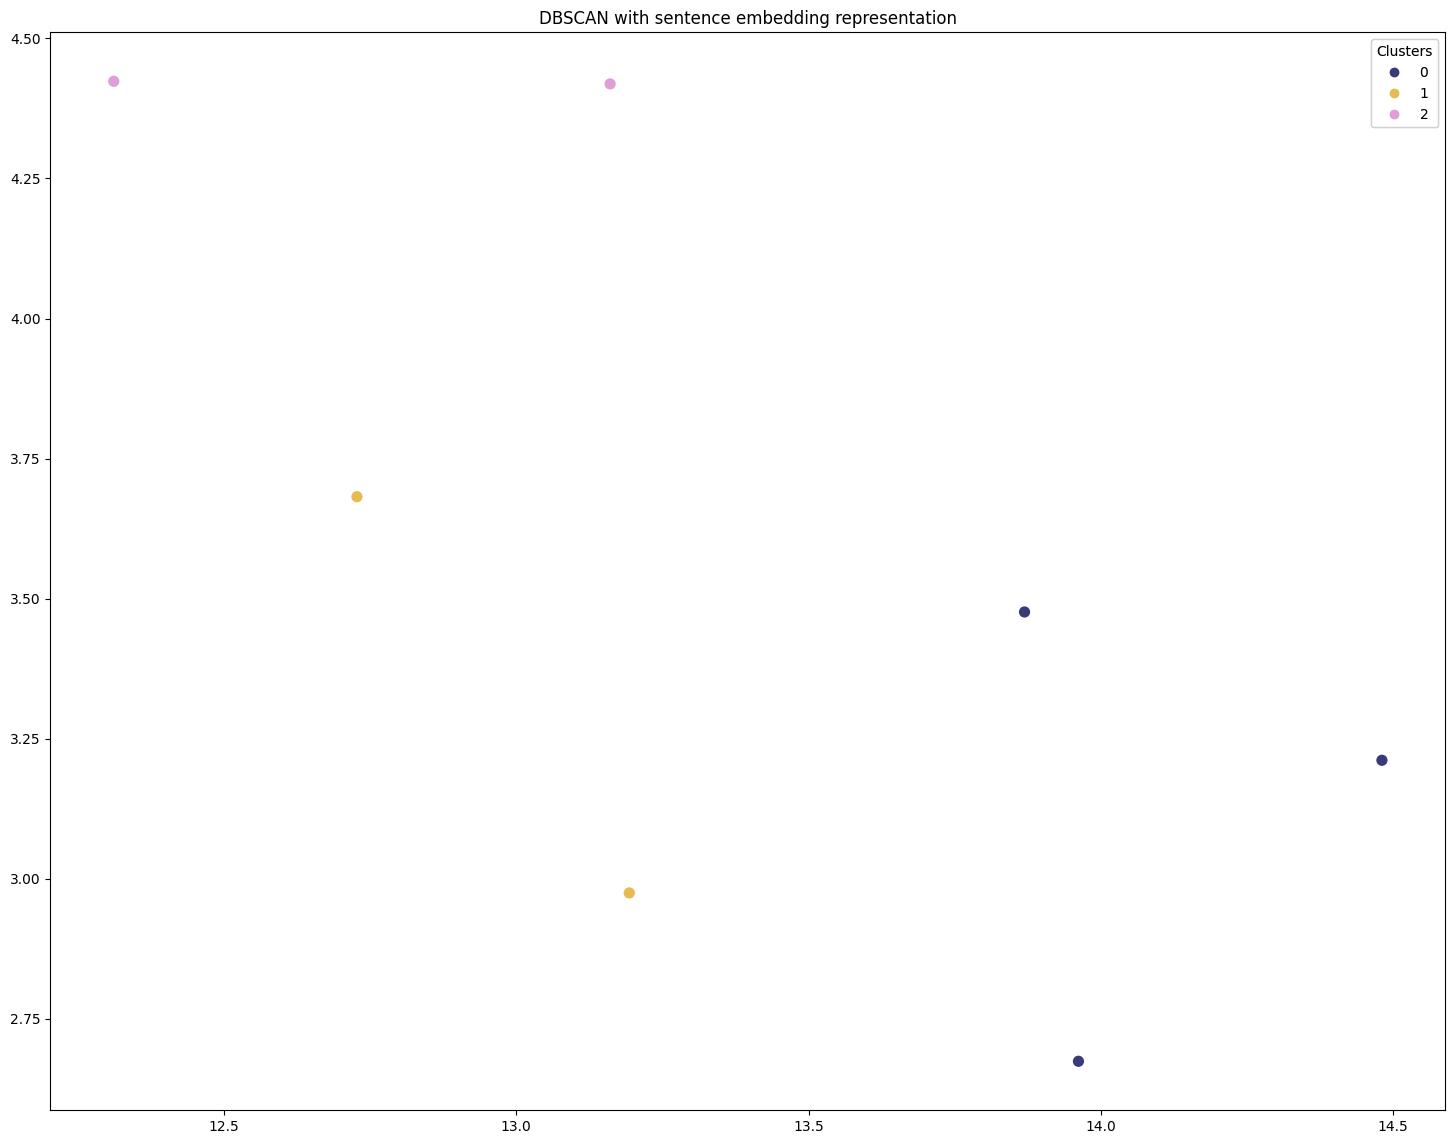

c:\Users\lesle\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\lesle\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


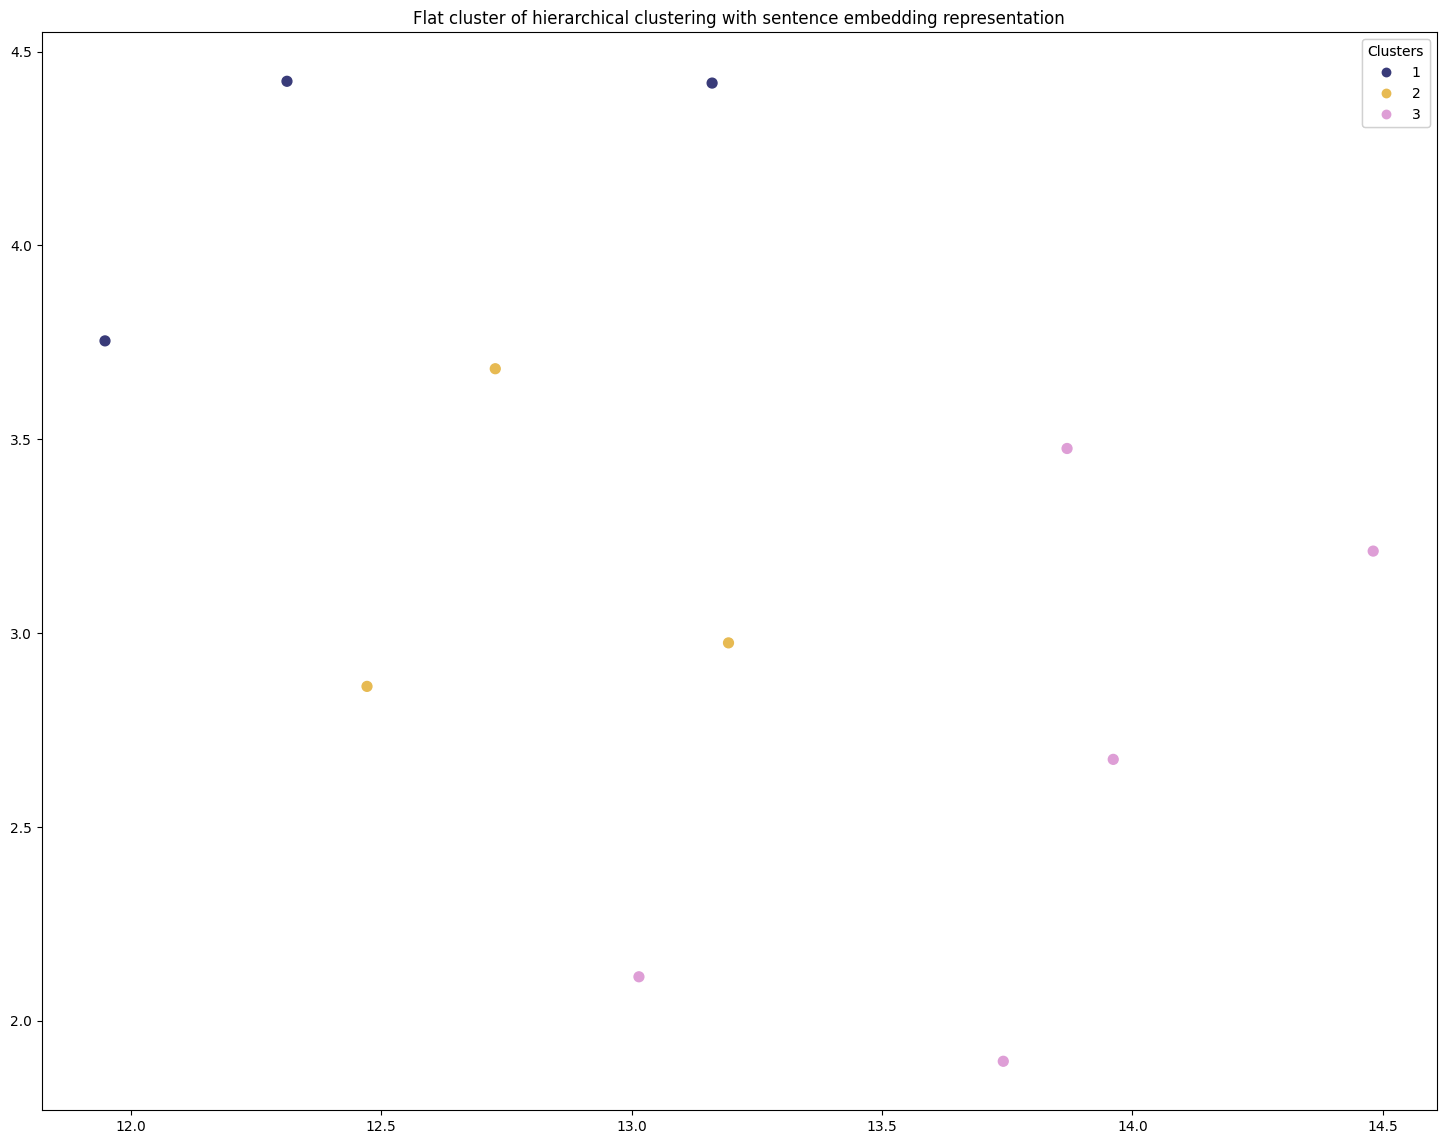

In [22]:
plot_umap_clusters(
    data=X_counts,
    cluster_labels=kmeans_bow_labels,
    title="K-Means with bag-of-words representation "
)

plot_umap_clusters(
    data=emb_sents,
    cluster_labels=kmeans_emb_labels,
    title="K-Means with sentence embedding representation"
)

plot_umap_clusters(
    data=emb_sents,
    cluster_labels=dbscan_emb_labels,
    title="DBSCAN with sentence embedding representation",
    ignore_noise=True 
)

plot_umap_clusters(
    data=emb_sents,
    cluster_labels=hier_emb_labels,
    title="Flat cluster of hierarchical clustering with sentence embedding representation"
)

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 2: [Food.com](https://www.food.com/) recipes 
<hr>

Now that we have applied document clustering on a toy corpus, let's move to a more realistic corpus. 

In the lecture, we worked on an activity of manually clustering food items and discussed challenges associated with it. We also applied different clustering algorithms to cluster food images. We'll continue this theme of clustering food items in this lab. But instead of images we will cluster textual description of food items, i.e., recipe names.   

In this lab, we will work with a sample of [Kaggle's Food.com recipes corpus](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions). This corpus contains 180K+ recipes and 700K+ recipe reviews. In this lab, we'll only focus on recipes and **not** on reviews. The recipes are present in `RAW_recipes.csv`. Our goal is to find categories or groupings of recipes from this corpus based on their names. 

**Your tasks:**

- Download [`RAW_recipes.csv`](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions?select=RAW_recipes.csv) and put it under the `data` directory in the homework folder. 
- Run the code below. The dataset is quite large, and in this assignment, for speed, you will work with a sample of the dataset. The function `get_recipes_sample` below carries out some preliminary preprocessing and returns a sample of the recipes with most frequent tags. 

> *Note: Depending upon the capacity of your computer, feel free to increase or decrease the size of this sample by changing the value for `n_tags`. If you decide to go with a different value of `n_tags`, state it clearly in Exercise 2.1 so that the grader knows about it.* 

In [23]:
orig_recipes_df = pd.read_csv("data/RAW_recipes.csv")
orig_recipes_df.shape

(231637, 12)

In [24]:
def get_recipes_sample(orig_recipes_df, n_tags=300, min_len=5):
    orig_recipes_df = orig_recipes_df.dropna()  # Remove rows with NaNs.
    orig_recipes_df = orig_recipes_df.drop_duplicates(
        "name"
    )  # Remove rows with duplicate names.
    # Remove rows where recipe names are too short (< 5 characters).
    orig_recipes_df = orig_recipes_df[orig_recipes_df["name"].apply(len) >= min_len]
    # Only consider the rows where tags are one of the most frequent n tags.
    first_n = orig_recipes_df["tags"].value_counts()[0:n_tags].index.tolist()
    recipes_df = orig_recipes_df[orig_recipes_df["tags"].isin(first_n)]
    return recipes_df

In [25]:
recipes_df = get_recipes_sample(orig_recipes_df)
recipes_df.shape

(9100, 12)

In [26]:
recipes_df["name"]

42        i yam what i yam  muffins    
101       to your health  muffins      
129       250 00 chocolate chip cookies
138       lplermagronen                
163       california roll   salad      
                   ...                 
231430    zucchini wheat germ cookies  
231514    zucchini blueberry bread     
231547    zucchini salsa burgers       
231596    zuppa toscana                
231629    zydeco salad                 
Name: name, Length: 9100, dtype: object

<br><br>

**In the rest of the homework, we will use `recipes_df` above, which is a subset of the original dataset.** 

<br><br>

<!-- BEGIN QUESTION -->

### 2.1 Longest and shorter recipe names 
rubric={points:2}

**Your tasks:**

1. Print the shortest and longest recipe names (length in terms of number of characters) from `recipes_df`. If there is more than one recipe with the same shortest/longest length, store **one** of them in `shortest_recipe` and/or `longest_recipe` as a **string**.

<div class="alert alert-warning">

Solution_2.1
    
</div>

_Points:_ 2

In [27]:
shortest_recipe = recipes_df.loc[recipes_df['name'].apply(len).idxmin(), 'name']

longest_recipe = recipes_df.loc[recipes_df['name'].apply(len).idxmax(), 'name']

print(shortest_recipe)
print(longest_recipe)


bread
baked tomatoes with a parmesan cheese crust and balsamic drizzle


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 2.2 More EDA
rubric={points:2}

**Your tasks:**
1. Create a word cloud for the recipe names. You can use [the `wordcloud` package](https://github.com/amueller/word_cloud) for this, which you will have to install in the course environment.
```
> conda activate cpsc330
> conda install -c conda-forge wordcloud
```

<div class="alert alert-warning">

Solution_2.2
    
</div>

_Points:_ 2

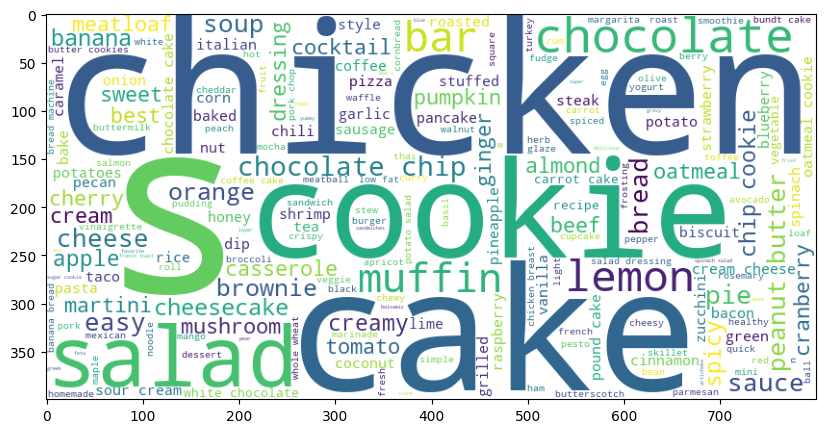

In [28]:
from wordcloud import WordCloud
text = " ".join(recipes_df['name'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.show()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 2.3 Representing recipe names
rubric={points:3}

The next step is creating a representation of recipe names. 

**Your tasks:**

1. Similar to Exercise 1, create sentence embedding representation of recipe names (`name` column in `recipes_df`).  For the rest of the homework, we'll stick to the sentence embedding representation of recipe names.


> You might have to convert the recipe names to a list (`recipes_df["name"].tolist()`) for the embedder to work
> *If you create a dataframe with sentence embedding representation, set the index to `recipes_df.index` so that the indices match with the indices of the sample we are working with.*  
> **This might take a while to run.**


<div class="alert alert-warning">

Solution_2.3
    
</div>

_Points:_ 3

In [29]:
recipe_names = recipes_df["name"].tolist()
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(recipe_names)

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 3: Clustering recipe names
<hr>

In this exercise you'll cluster recipe names with some of the clustering algorithms we have seen in class. This will also involve making some attempts to pick reasonable hyperparameter values for each clustering method based on the quality of the resulting clusters. For example, for KMeans, you need to specify the number of clusters in advance, which is often challenging on real-world datasets. For DBSCAN, you need to pick appropriate `eps` and `min_samples`. For hierarchical clustering, you need to pick a suitable linkage criterion, distance metric, and prune the tree so that it's possible to visualize and interpret it. 

Here are some methods which may help you with picking reasonable values for the hyperparameters. 
- Visualize the Elbow plot (KMeans). 
- Visualize Silhouette plots. 
- Visualize resulting clusters using `plot_umap_clusters` function from Exercise 1. 
- Sample some recipes from each cluster, manually inspect whether there are coherent semantic themes. (For this, you may use the function `print_clusters` given below.) 
        
> You may use the [`yellowbrick`](https://www.scikit-yb.org/en/latest/) package for visualizing the Elbow plot and the Silhouette plots. You can intall it with

```conda install -c districtdatalabs yellowbrick```

**Note that the process of picking reasonable hyperparameter values will be exploratory, iterative, and will involve manual inspection and judgment, as there is no ground truth to verify how well the model is doing. In your solutions, please do not include everything you try. Only present the results of the most informative trials. Add a narrative to your answer so that it's easy for the grader to follow your choices and reasoning.** 

In [30]:
def print_clusters(recipes_df, cluster_labels, n_recipes=10, replace=False, random_state=None):
    """
    Given recipes_df containing recipe names and cluster assignment (labels), 
    sample and print n_recipes recipes per cluster. 

    Parameters
    -----------
    recipe_df : pandas dataframe 
        recipes dataframe containing recipe names in the "name" column
    cluster_labels : ndarray or a list
        cluster labels for each row in recipes_df 
    n_recipes : int
        number of examples to sample from each cluster
    replace: bool
        replace flag to pass to the sampling of recipe names

    Returns
    -----------
    None
    """    
    
    grouped = (
        pd.DataFrame(
            {
                "name": recipes_df["name"],
                "cluster_label": cluster_labels,
            }
        )
        .sort_values("cluster_label")
        .groupby("cluster_label")    
    )
    
    for name, group in grouped:
        print(f"Cluster {name}")        
        print(("----------").format(""))        
        print("\n".join(group.sample(n_recipes, random_state=random_state)['name'].tolist()))
        print("\n\n")

<br><br>

<!-- BEGIN QUESTION -->

### 3.1 K-Means
rubric={points:6}

**Your tasks:**

1. Cluster recipe titles using KMeans. Make some attempts to determine the optimal number of clusters. 
2. Pick one or two best models and justify your choice. 

<div class="alert alert-warning">

Solution_3.1
    
</div>

_Points:_ 6

I used the KElbowVisualizer to find the best k, which is the one where we find the elbow (k=4), when I clustered the recipes, we find that, cookies and cakes recipies are together, salty recipies are together, which seems really good, drinks are together...

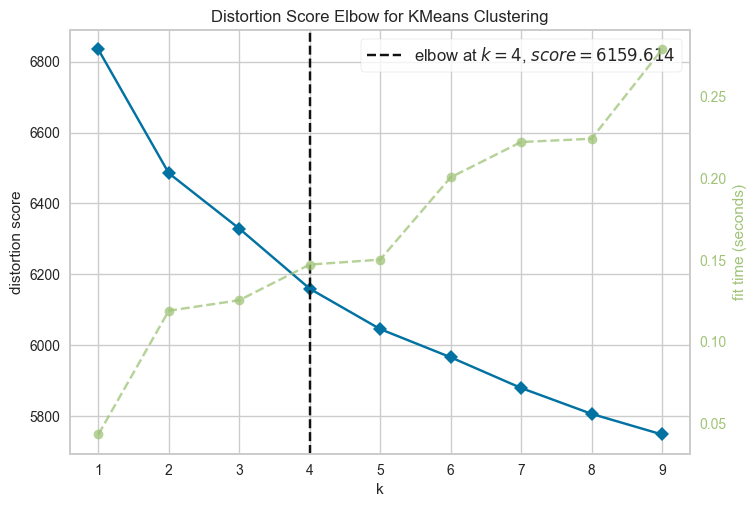

In [31]:
# Code from lecture 15
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k = range(1, 10, 1))

visualizer.fit(embeddings)  # Fit the data to the visualizer
visualizer.show();

From the elbow plot above, we can see that there isn't a clear elbow. Running this with a much bigger range of 'k' values, we do see the score continue to decrease, but we don't see the drastic curving point. Therefore it looks reasonable to try something around 3-5 for the number of clusters.

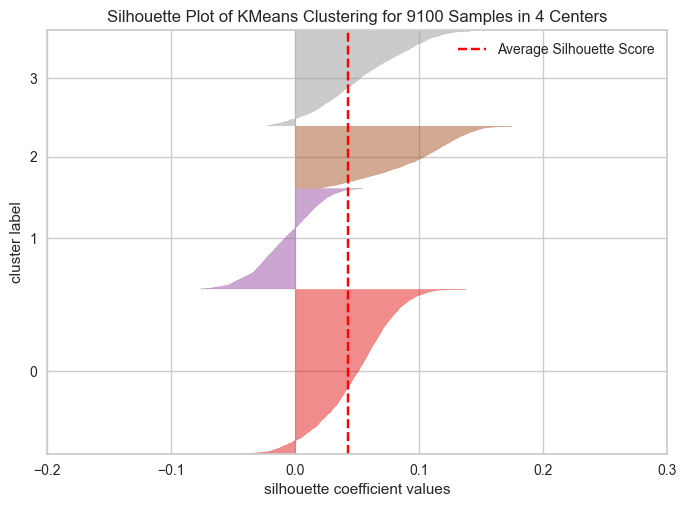

In [32]:
model = KMeans(visualizer.elbow_value_, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(embeddings)  # Fit the data to the visualizer
visualizer.show();

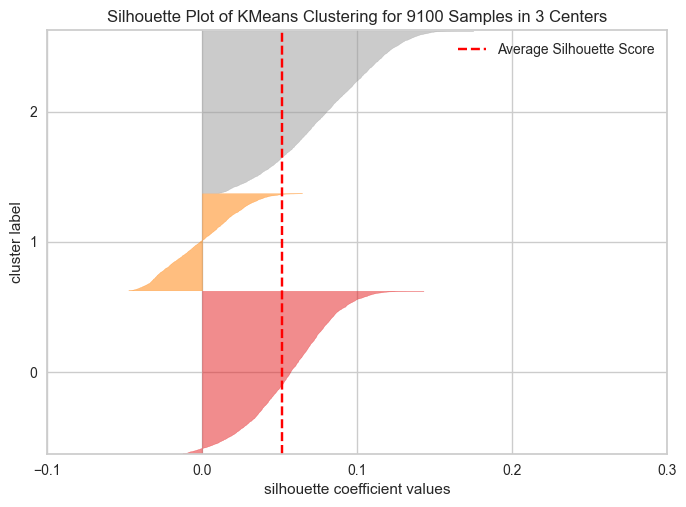

In [33]:
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(embeddings)  # Fit the data to the visualizer
visualizer.show();

Looking at the above two k-plots, it looks like there is always a category that has points that are defined 'in the wrong category'. But this continues all the way down to k=2, so I think that is a bit misleading in these cases, especially as the data does have a good amount of overlap.

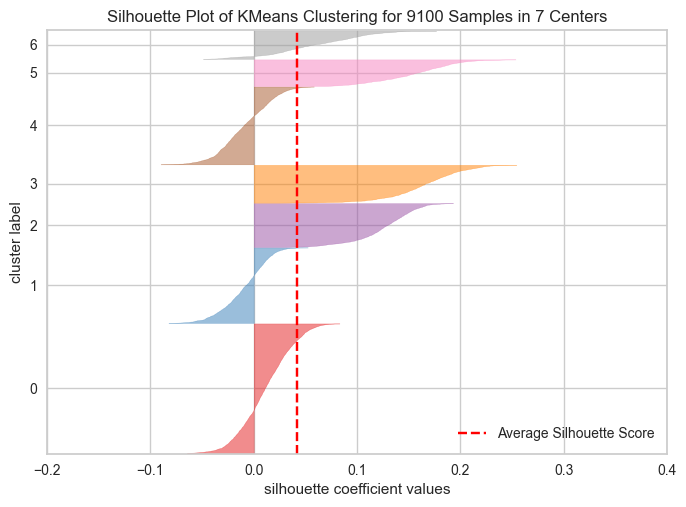

In [34]:
model = KMeans(7, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(embeddings)  # Fit the data to the visualizer
visualizer.show();

Running the silhouette plot for a higher cluster value, we do see some clusters reach a higher coefficient, but there are more clusters reporting mislabeling, and over all the average score goes down, so I don't think this is an improvement. 

c:\Users\lesle\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


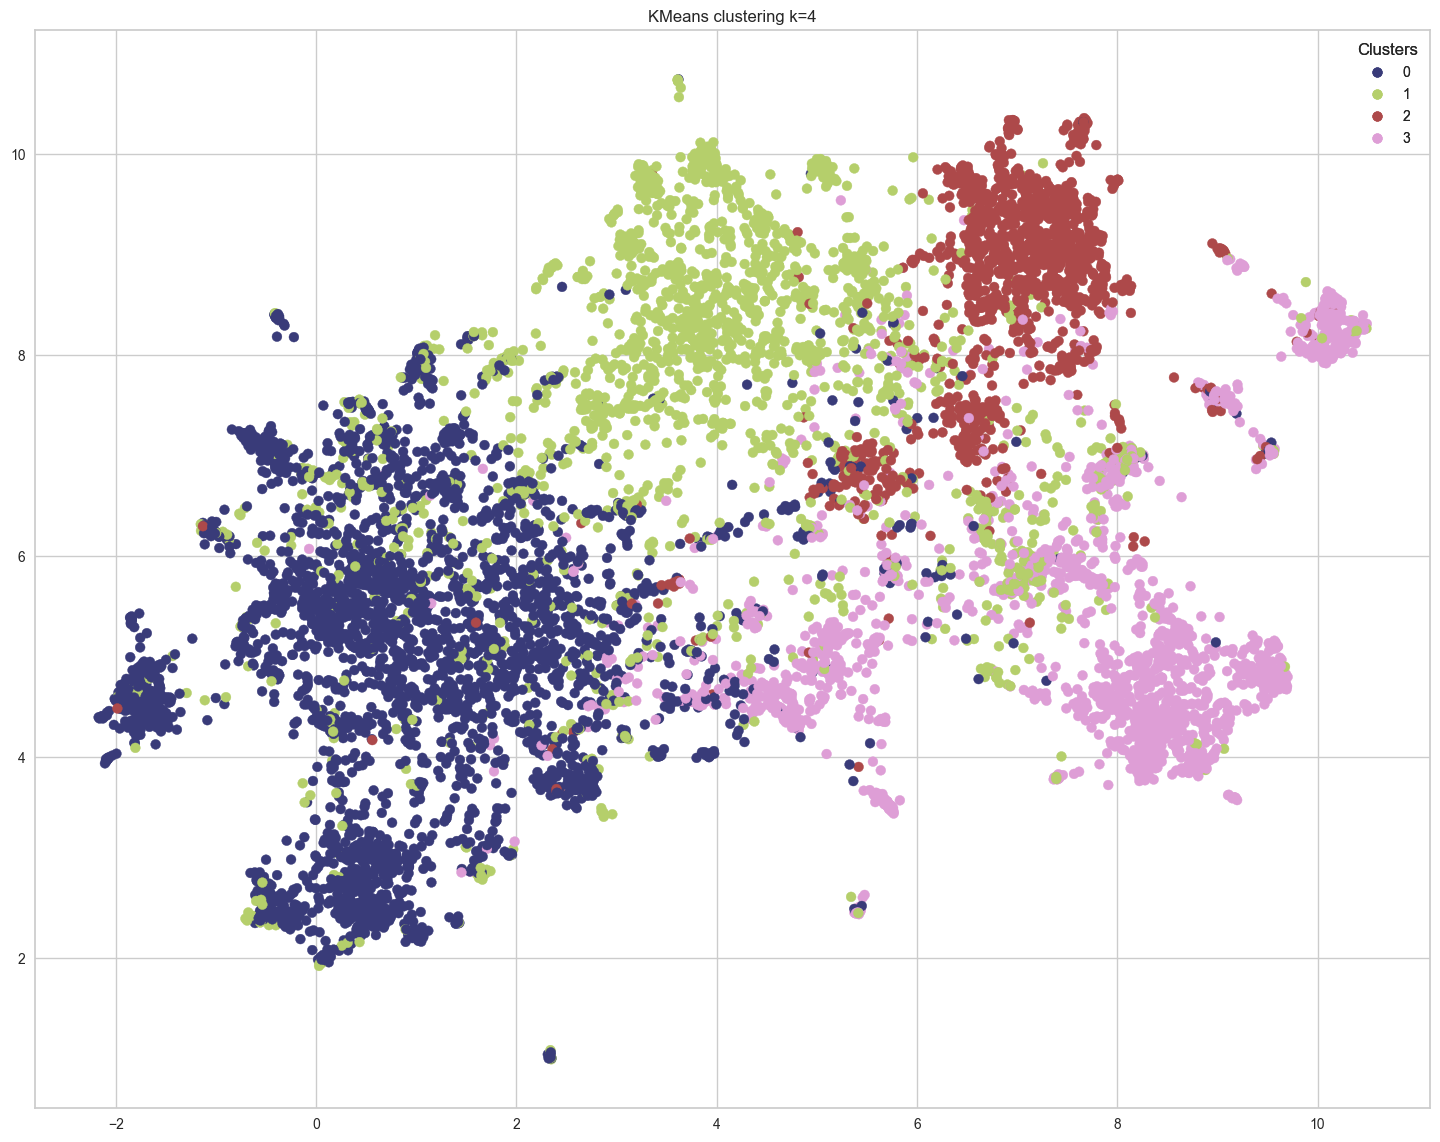

In [35]:
k = 4

kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

plot_umap_clusters(
    data=embeddings,
    cluster_labels=cluster_labels,
    title=f"KMeans clustering k={k}"
)

c:\Users\lesle\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


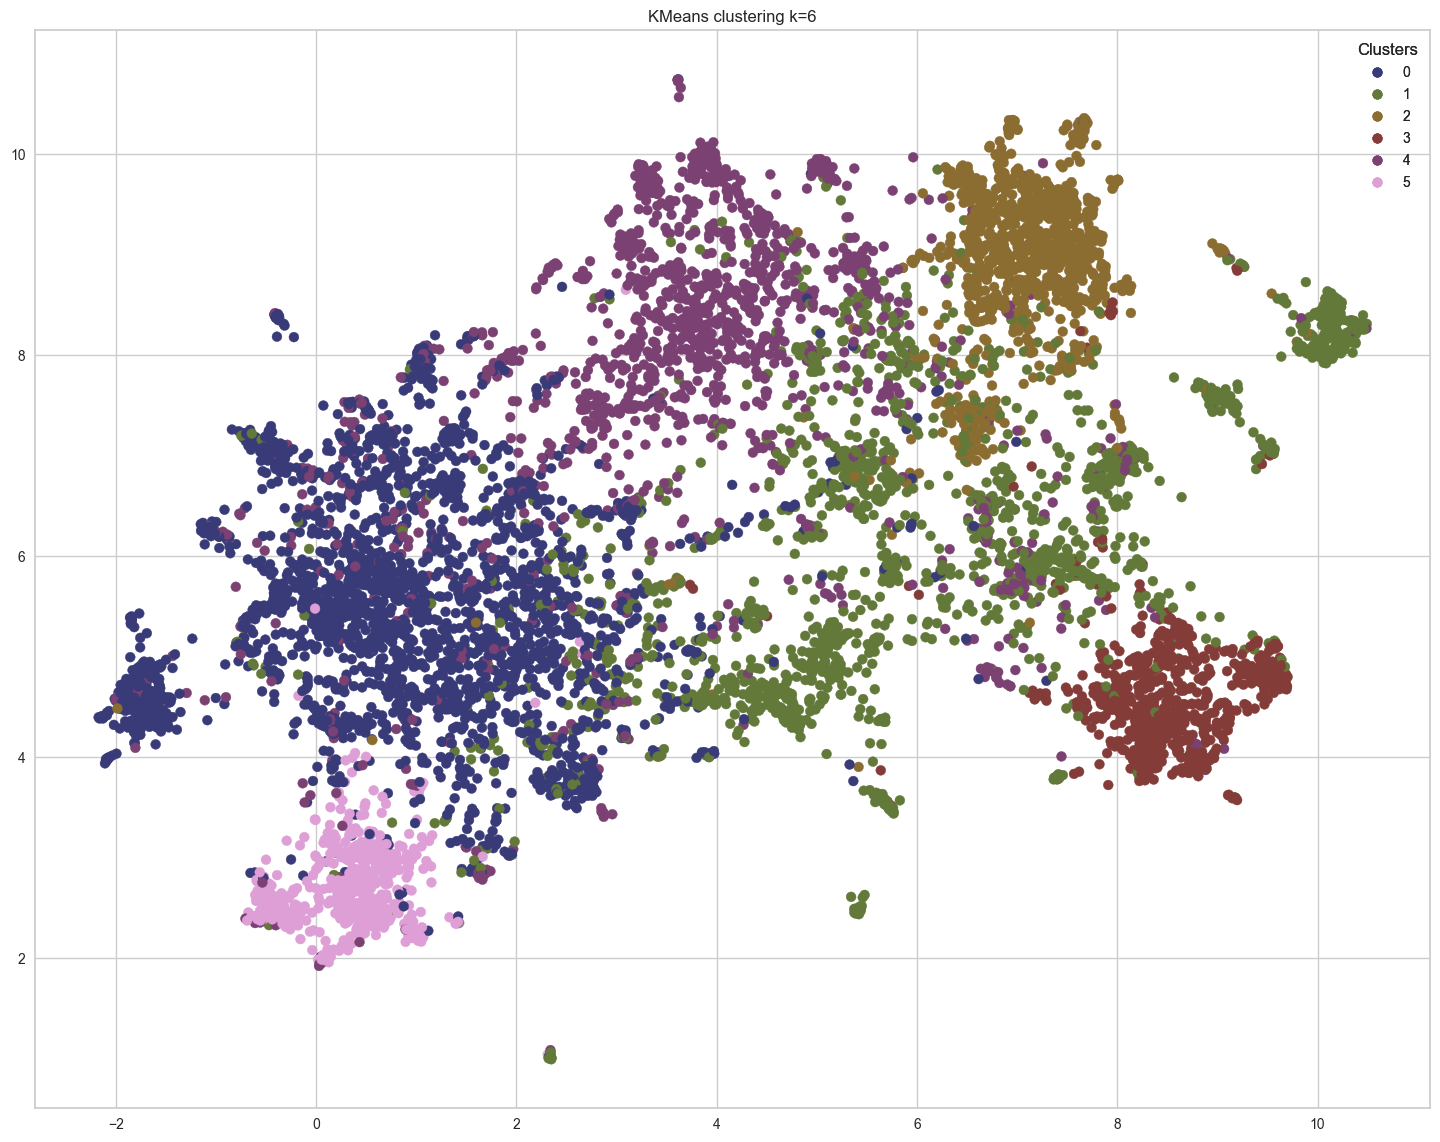

In [36]:
k = 6

kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

plot_umap_clusters(
    data=embeddings,
    cluster_labels=cluster_labels,
    title=f"KMeans clustering k={k}"
)

c:\Users\lesle\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


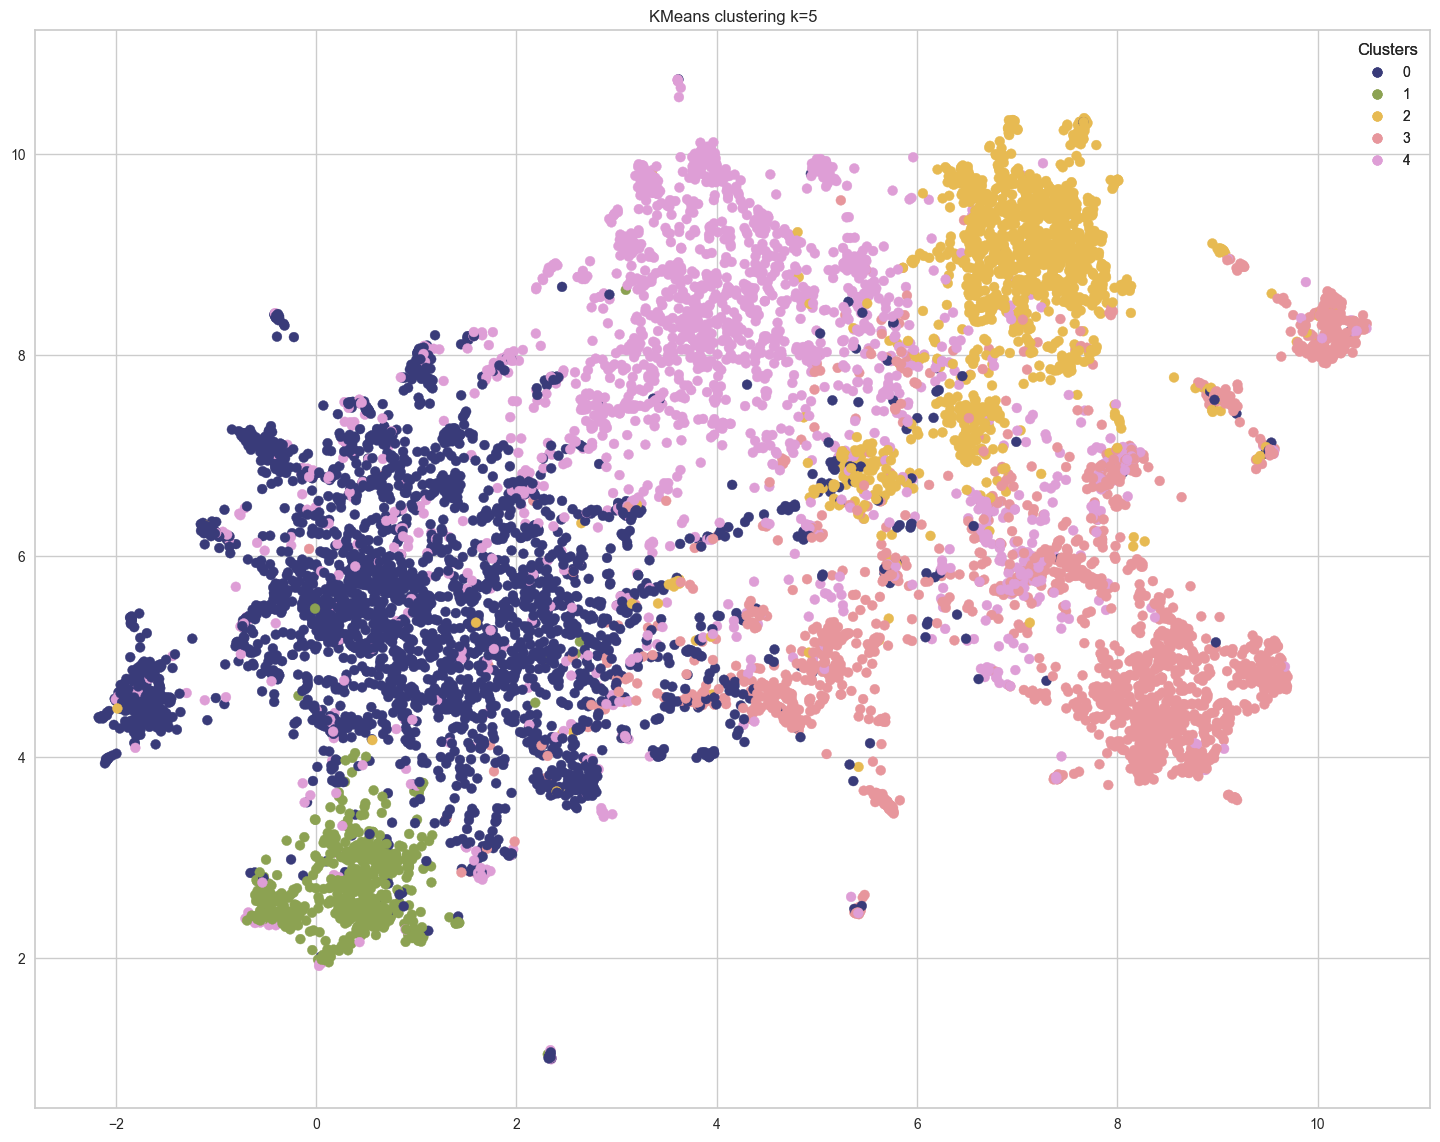

In [37]:
k = 5

kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

plot_umap_clusters(
    data=embeddings,
    cluster_labels=cluster_labels,
    title=f"KMeans clustering k={k}"
)

Looking at plots of k = 3, 4, 5, 6 they all look fairly reasonable, it is hard to tell if k = 6 is the best, and there are six big groups, or if some of those groups need to be combined together. In all cases there is a fair amount of overlap between the sections. 

In [38]:
print_clusters(recipes_df, cluster_labels, n_recipes=10, random_state=42)


Cluster 0
----------
pizza skulls
weight watcher s general tsao s chicken
orange dijon pork
carob pudding  juliano    raw
cheesy burger bake
ginger peanut stir fry sauce
quick shrimp and pasta
chicken tetrazzini iv
garlic crostini
caramelized onion skillet corn bread



Cluster 1
----------
cherry tomato salad with blue cheese
vermont country salad
lincoln highway salad dressing
martha s vineyard salad
butter lettuce salad with bacon  dried cherries and roquefort vi
barbecue shrimp and sugar snap pasta salad   clean eating
tarragon chicken salad
ninja creamy italian dressing
black bean   quinoa salad with cilantro lime vinaigrette
raspberry tossed salad



Cluster 2
----------
swedish spicy lemon cardamom cake
french vanilla brickle cake
saucy cranberry cake
finnish tiikerikkakku  tiger cake
peanut butter and chocolate bundt cake
upside down ginger apple coffee cake  clean eating
bahama mama banana rum cake
star fruit  carambola  upside down cake
pumpkin spice waffles
david s carrot ca

Looking at k = 5 clusters, we do see some pretty distinct categories, like mostly cookies and dessert in cluster 3, mostly cake and pastry in cluster 2. Cluster 0 is pretty much solely savory and entrees, and it looks like cluster 1 is salads, and cluster 4 is drinks.

<!-- END QUESTION -->

<br><br><br><br>

<!-- BEGIN QUESTION -->

### 3.2 DBSCAN
rubric={points:6}

**Your tasks:**

1. Cluster recipe names using `DBSCAN` with `metric="cosine"`. Make some attempts to tune the  hyperparameters `eps` and `min_samples`. 

<div class="alert alert-warning">

Solution_3.2
    
</div>

_Points:_ 6

In [39]:
pd.DataFrame(cosine_distances(embeddings, embeddings))

,0,1,2,3,4,5,6,7,8,9,...,9090,9091,9092,9093,9094,9095,9096,9097,9098,9099
0,0.000000,0.383724,0.755344,0.909151,0.794291,0.838862,0.692812,0.731496,0.749094,0.902957,...,0.543103,0.461150,0.798366,0.784716,0.806169,0.659702,0.719379,0.756506,0.852059,0.835691
1,0.383724,0.000000,0.762506,0.873885,0.801132,0.796770,0.669851,0.839360,0.788424,0.912995,...,0.539487,0.405747,0.748338,0.788581,0.753616,0.658055,0.720370,0.828407,0.853312,0.826528
2,0.755344,0.762506,0.000000,0.953950,0.813962,0.879565,0.682855,0.753413,0.659981,0.891527,...,0.573493,0.726577,0.901261,0.849883,0.831109,0.582373,0.758930,0.844966,0.860926,0.801662
3,0.909151,0.873885,0.953950,0.000000,0.957999,0.860555,0.923295,0.793754,0.877226,0.714144,...,1.018425,0.969694,0.863956,0.926894,0.875245,1.006131,0.922037,0.964320,0.818746,0.778231
4,0.794291,0.801132,0.813962,0.957999,0.000000,0.401389,0.817677,0.726381,0.820726,0.755368,...,0.755795,0.716505,0.654886,0.669349,0.708277,0.742515,0.714717,0.641078,0.745343,0.490062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9095,0.659702,0.658055,0.582373,1.006131,0.742515,0.759157,0.696667,0.822281,0.884005,0.780130,...,0.287411,0.319897,0.482439,0.496917,0.442205,0.000000,0.397161,0.524735,0.774499,0.689785
9096,0.719379,0.720370,0.758930,0.922037,0.714717,0.711692,0.763162,0.766932,0.860429,0.723759,...,0.381985,0.349118,0.452791,0.407170,0.379226,0.397161,0.000000,0.423045,0.676171,0.663239
9097,0.756506,0.828407,0.844966,0.964320,0.641078,0.607145,0.793308,0.726637,0.841215,0.634600,...,0.450207,0.442176,0.429882,0.424610,0.396571,0.524735,0.423045,0.000000,0.596509,0.570324
9098,0.852059,0.853312,0.860926,0.818746,0.745343,0.848744,0.809270,0.811410,0.873099,0.901696,...,0.718899,0.681442,0.656416,0.599098,0.488856,0.774499,0.676171,0.596509,0.000000,0.684149


In [40]:
eps_values = np.arange(0.2, 0.6, 0.05)
min_samples_values = np.arange(2, 11, 1)

from collections import Counter

for eps in eps_values:
    for min_samples in min_samples_values:
        clusters = DBSCAN(metric='cosine', eps=eps, min_samples=min_samples).fit(embeddings)
        cluster_labels = clusters.labels_
        
        non_neg = [num for num in cluster_labels if num>=0]
        n_clusters = len(set(non_neg))
        noise_points = list(cluster_labels).count(-1)
        
        if 2 <= n_clusters <= 10:
            print(Counter(cluster_labels))
            print(f"DBSCAN with eps={eps}, min_samples={min_samples}")
            print(f"# clusters (no noise): {n_clusters}")
            print(f"# noise points: {noise_points}")

Counter({np.int64(0): 7080, np.int64(-1): 1973, np.int64(1): 8, np.int64(2): 7, np.int64(3): 6, np.int64(5): 6, np.int64(6): 5, np.int64(7): 5, np.int64(4): 4, np.int64(8): 4, np.int64(9): 2})
DBSCAN with eps=0.35, min_samples=5
# clusters (no noise): 10
# noise points: 1973
Counter({np.int64(0): 6992, np.int64(-1): 2071, np.int64(1): 8, np.int64(2): 7, np.int64(3): 6, np.int64(5): 6, np.int64(4): 5, np.int64(6): 5})
DBSCAN with eps=0.35, min_samples=6
# clusters (no noise): 7
# noise points: 2071
Counter({np.int64(0): 6865, np.int64(-1): 2216, np.int64(2): 8, np.int64(1): 7, np.int64(3): 4})
DBSCAN with eps=0.35, min_samples=7
# clusters (no noise): 4
# noise points: 2216
Counter({np.int64(0): 6662, np.int64(-1): 2411, np.int64(3): 8, np.int64(4): 8, np.int64(2): 6, np.int64(1): 5})
DBSCAN with eps=0.35, min_samples=9
# clusters (no noise): 5
# noise points: 2411
Counter({np.int64(0): 6539, np.int64(-1): 2527, np.int64(1): 17, np.int64(2): 9, np.int64(3): 8})
DBSCAN with eps=0.35, min

Above is a rough print out of the results of trying different parameter values. I played around with this range a lot but it is really hard to get the model away from 1 big category, or just a ton of noise. 

Counter({np.int64(-1): 8750, np.int64(1): 236, np.int64(2): 30, np.int64(3): 24, np.int64(5): 19, np.int64(0): 17, np.int64(4): 14, np.int64(6): 10})


c:\Users\lesle\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


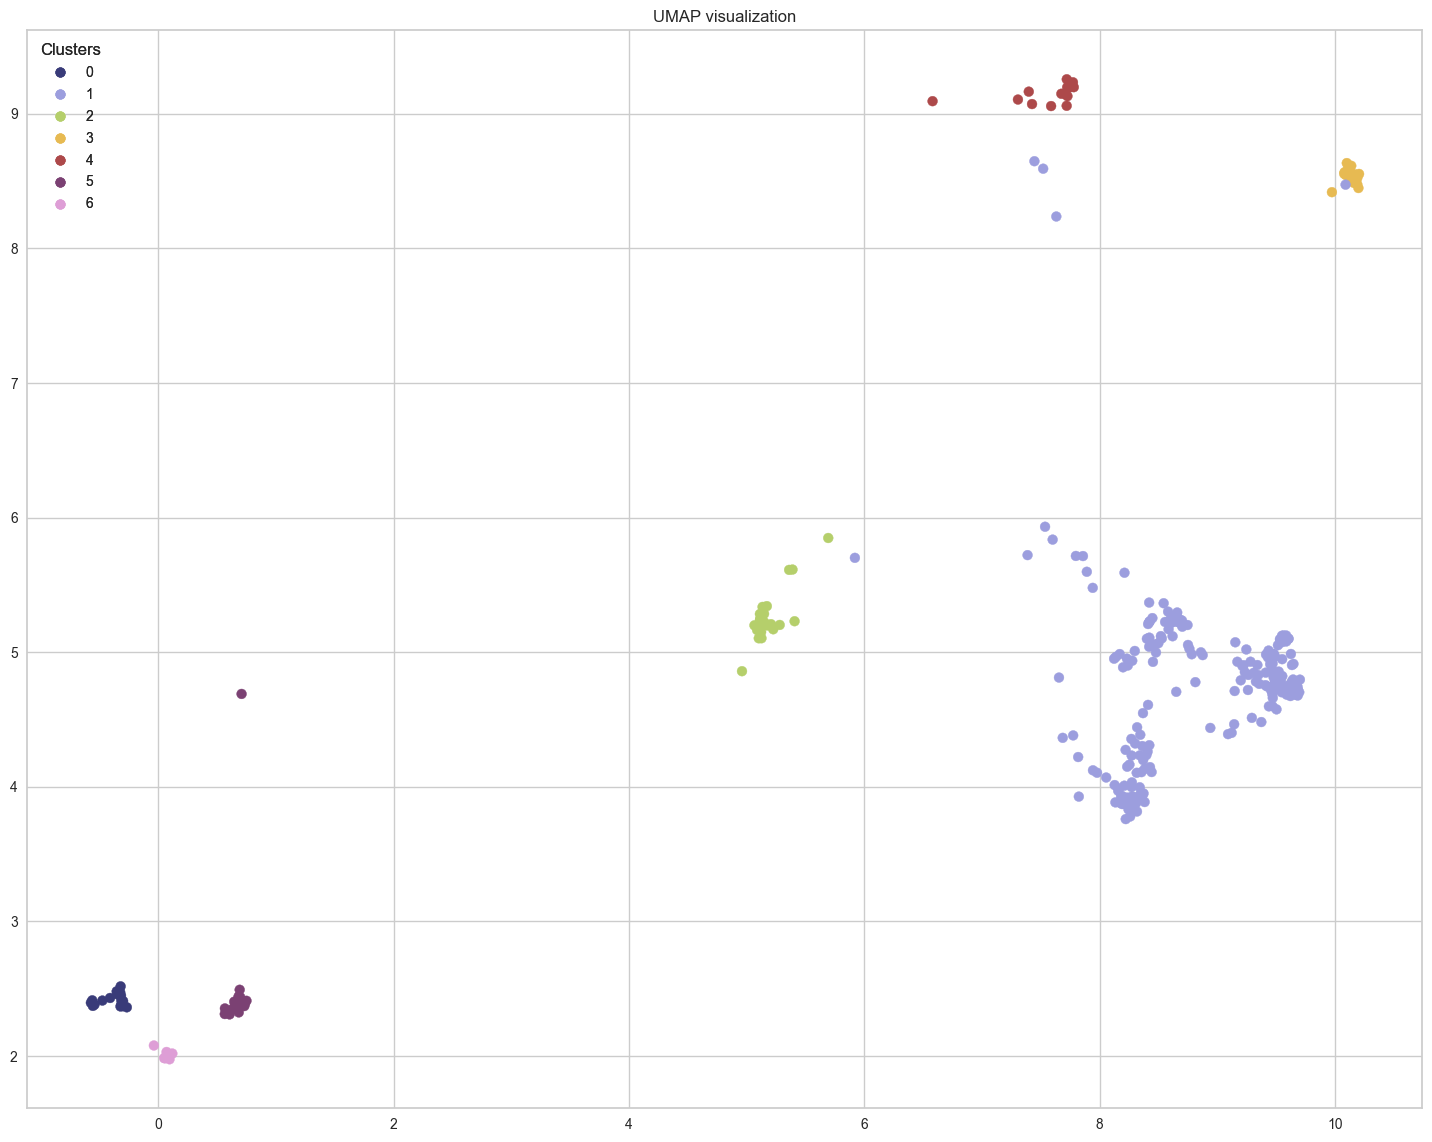

In [41]:
clusters = DBSCAN(metric='cosine', eps=0.179, min_samples=10).fit(embeddings)
print(Counter(clusters.labels_))

plot_umap_clusters(
    data=embeddings,
    cluster_labels=clusters.labels_,
    ignore_noise=True
)

Counter({np.int64(-1): 5400, np.int64(0): 3621, np.int64(1): 29, np.int64(3): 27, np.int64(2): 23})


c:\Users\lesle\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


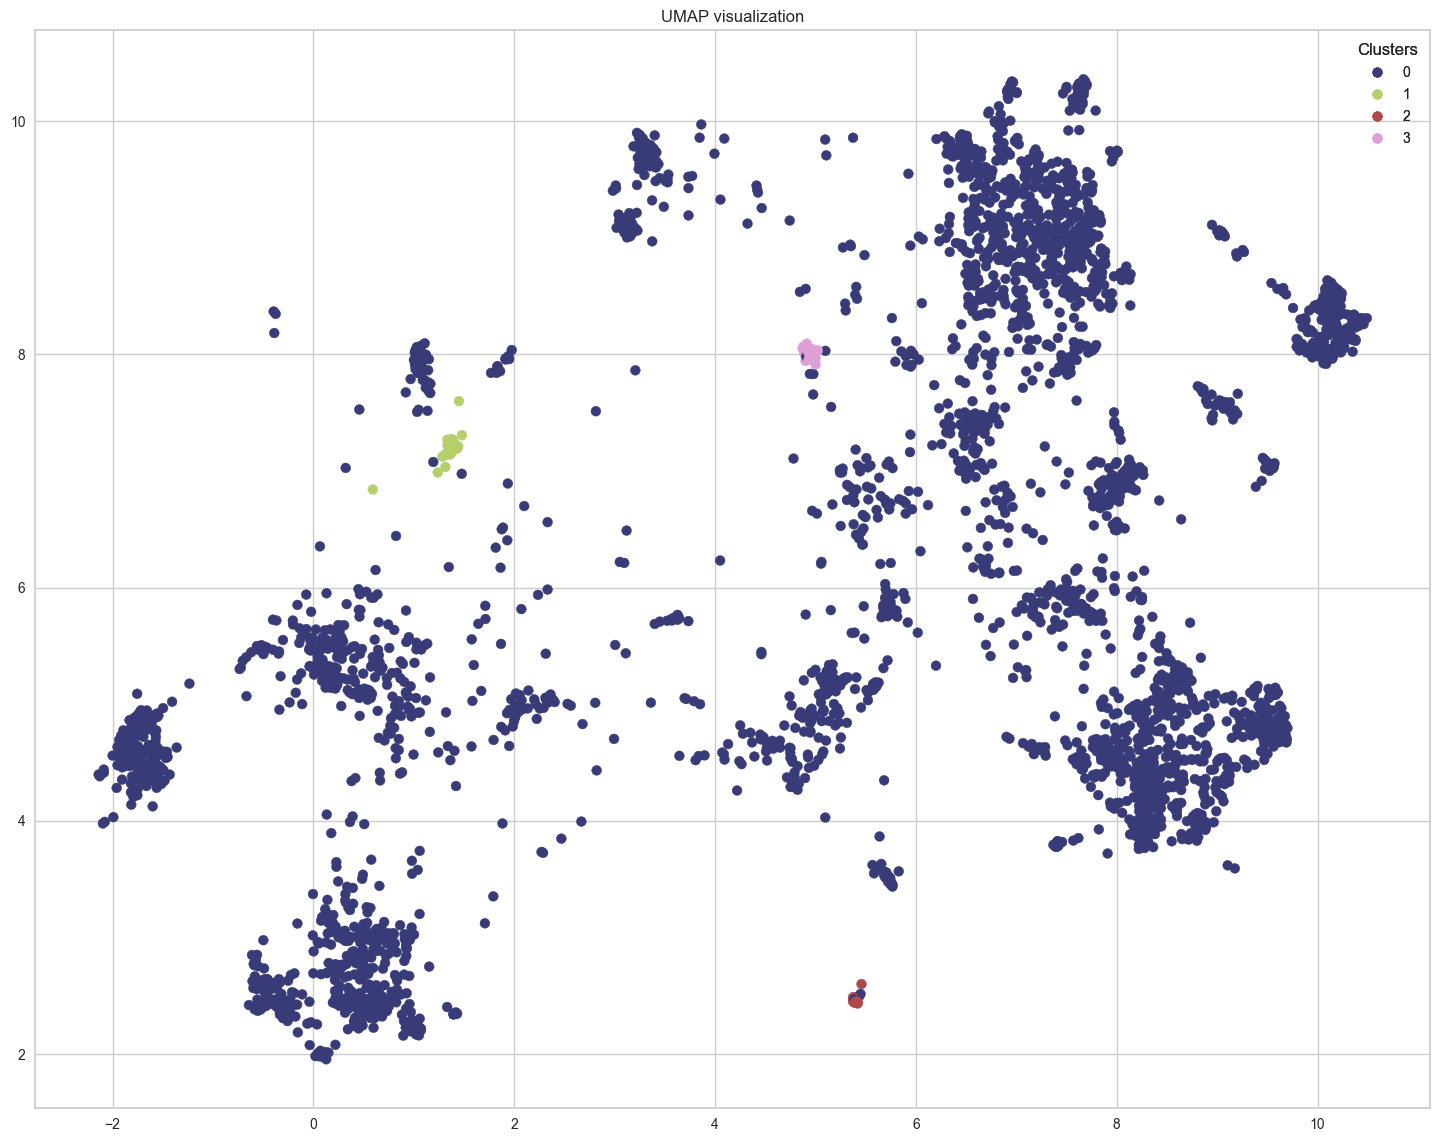

In [42]:
clusters = DBSCAN(metric='cosine', eps=0.32, min_samples=27).fit(embeddings)
print(Counter(clusters.labels_))

plot_umap_clusters(
    data=embeddings,
    cluster_labels=clusters.labels_,
    ignore_noise=True
)

Looking at some of the most distinct clusters I could get (that wasn't jsut one big one), but to see anything distinctly I had to stop viewing the noise, which is pretty much all the data. In the second scatter plot, it just looks like one big cluster starts to take over the whole plot,so I suspect we are dealing with an issue of different data densities overlapping each other and it is making it very difficult for this tool.

In [43]:
print_clusters(recipes_df, clusters.labels_, n_recipes=5, random_state=42)

Cluster -1
----------
country chicken
blueberry turkey burgers
egyptian cake
scottish  bakers  shortbreads 1959
snow crab dip



Cluster 0
----------
date chip cake
fantastic fudgy butterscotch bars
greek garden salad
key lime jewel cookies
crispy stuffing coated chicken breasts



Cluster 1
----------
best meatballs
barbecue meatballs
nadine s meatballs
oven meatballs and gravy
make ahead meatballs



Cluster 2
----------
waffle style french toast
rum french toast crunch
french toast strata  sherry and jim rougeux
custardy french toast
sausage french toast



Cluster 3
----------
new years fruity smoothie
ultimate power smoothie
basic smoothie recipe
pre party smoothie
yummy yogurt smoothie





we can see that for the really small groups it did manage to make, mostly there was correct clsutering. But we are making too many small groups (there are three groups for salads)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 3.3 Hierarchical clustering
rubric={points:6}

**Your tasks:**

1. Try hierarchical clustering with `metric="cosine"` on this problem. Show a dendrogram by using a suitable truncation method. 
2. Create flat clusters by cutting the tree at the appropriate level. 

> *Note: Try orientation="left" of `dendrogram` for better readability of the dendrogram.*

<div class="alert alert-warning">

Solution_3.3
    
</div>

_Points:_ 6

I created the dendrogram then I tried to cut the tree to make different size of clusters, I thought 8 cluster might be the best because the distance becomes really short after that between clusters.

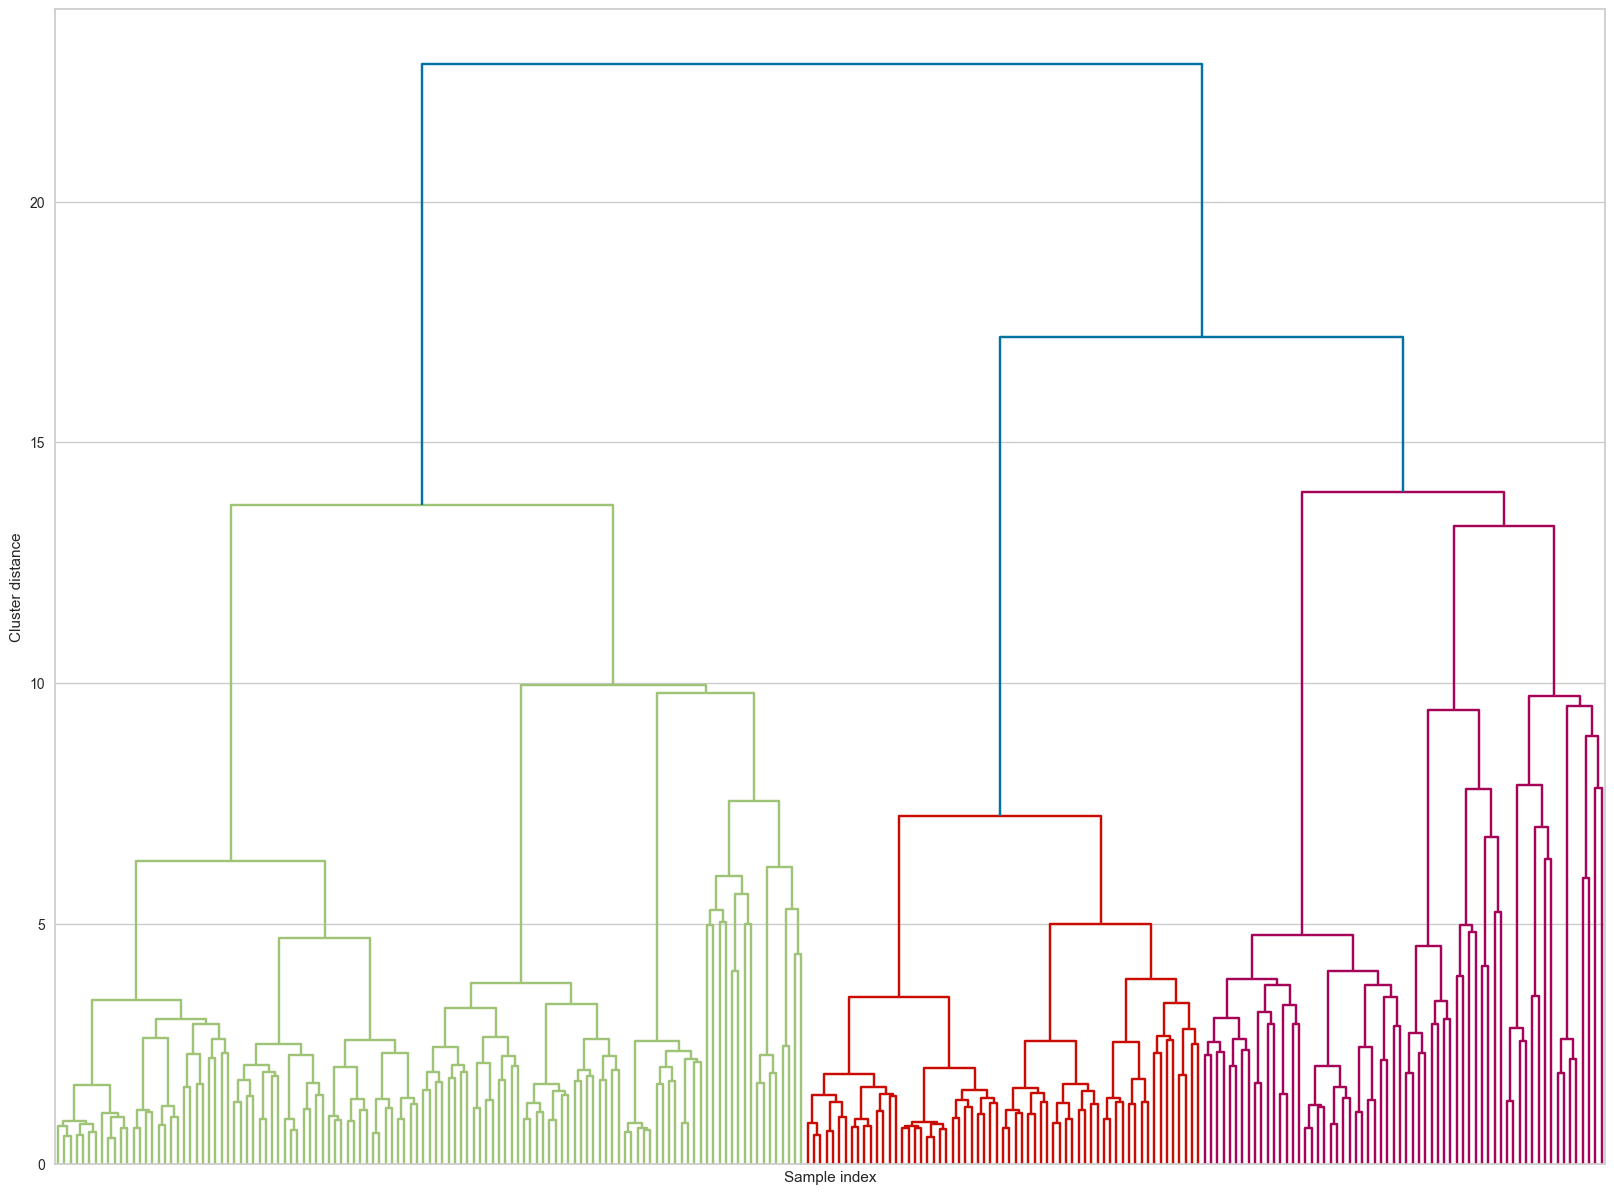

In [44]:
from scipy.cluster.hierarchy import dendrogram, ward

# code from lecture 15
plt.figure(figsize=(20, 15))
Z_hrch = ward(embeddings)
dendrogram(Z_hrch, p=7, truncate_mode="level", no_labels=True)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance");

There is a clear distinction where we can cut the data into 6 clusters, as well as 3. Around these two points, some of the branches get quite short and seem like they mightbe unstable places to split. 

In [45]:
cluster_labels_hrch = fcluster(Z_hrch, 6, criterion="maxclust") 
print_clusters(recipes_df, cluster_labels_hrch, n_recipes=20, random_state=42)


Cluster 1
----------
1905 salad dressing recipe
easy mustard vinaigrette
oprah s outtasight salad
sensational cucumber salad
strawberry  kiwi and spinach salad
penny s french dressing
buttermilk dressing  rachel ray
raspberry vinaigrette salad dressing
egg salad with bacon and olives
creamy basil dressing or dip
sweet dijon vinaigrette
vicky s pretzel salad
egg salad for sandwiches and more
secret recipe cold corn salad
christina s decadent spinach salad
cajun style shrimp salad
onion and mustard spinach salad dressing
warm garlic balsamic dressing
spinach  salad dressing
martha s vineyard salad



Cluster 2
----------
old fashioned cheese souffle
grilled mexican chicken breast
lemon and blueberry yogurt parfait  low fat
fettuccine with fresh vegetables
the geezer s deviled eggs
bistro style  beef steak sandwich
cabbage and mushroom soup
fruited balsamic chicken
sarasota s minnesota turkey  mushroom and wild rice soup
v s pepper blue pizza
low fat cappuccino cooler
chicpea salad sandwi

These 6 categories seem like they've done a pretty good job: clear distinction of salads in cluster 1, entrees in cluster 2, and mostly drinks in cluster 5. Clusters 2, 3, and 6 all feature somewhat dessert/sweet related items, but there is some clear distinction between cookie recipes, cakes, and other sorts of baked goods!

c:\Users\lesle\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


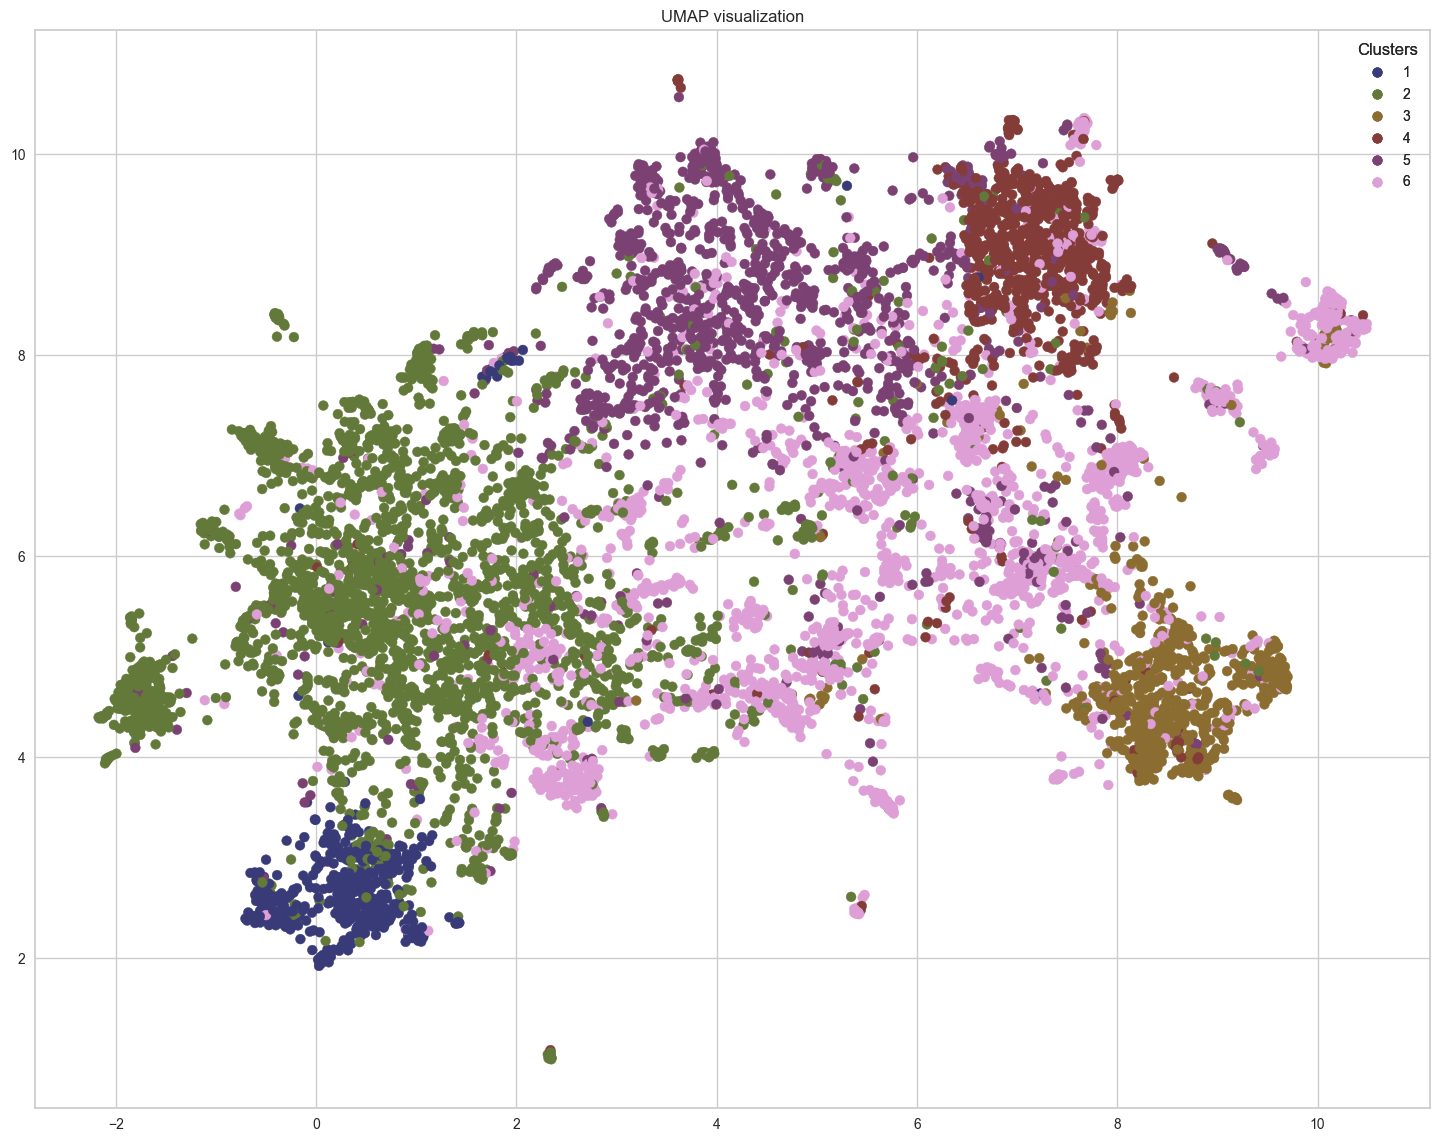

In [46]:
plot_umap_clusters(
    data=embeddings,
    cluster_labels=cluster_labels_hrch,
    ignore_noise=True
)

Visually, these clusters look pretty distinct, but especially the light pink cluster is a little harder to define, and we see it infringing on a lot of the other clusters

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 3.4 Manual interpretation of clusters
rubric={points:6}

**Your tasks:**

1. Label the topics/themes you see in the clusters created by different clustering methods.  
2. Do you see a common theme across clusters created by different clustering methods? Do you see any differences between the clusters created by different clustering methods? 

<div class="alert alert-warning">

Solution_3.4
    
</div>

_Points:_ 6

1. For hierarchical clustering with clustering = 6:
Cluster 1: Salads and dressings
Cluster 2: Entrees and Savory
Cluster 3: Cookies
Cluster 4: Cakes
Cluster 5: Drinks
Cluster 6: Muffins and Breads

For DBSCAN, there were no good distinct clusters. Either most of the recipes were in one big group, or there was a ton of noise. 

For K-Means k=4-5:
Cluster 0: Savory mains and side dishes
Cluster 1: salads and dressings
Cluster 2: cakes
Cluster 3: cookies
Cluster 4: drinks

2. The salads and the drinks clusters are often the same in each methods but the way they cluster savory dishes and sweet dishes is generally really different, they might seperate cakes and cookies, same for side and main dishes. Dessert seems like a particulary tricky category, where thigns that are sweet could all be categorized as one, but cookies and cakes get searated first, but then there are muffins and other things that kind of get mixd up. 

We can see this in the scatter plots, where the categories for cake and cookies and distinct subsection of the dessert area, but that area overall tends to spread out because words like bread can be used in many places, or things like crab cakes that are savory. 

But overall, all the themes are common, as in all the methods attempt to cluster in the same ways, even dbscan, when it started to find some small clusters, was grouping salads and cookies and cakes, which are easy themes for it to grab. 

It seems like, comparing kmeans and heirarchy, they make different boarders for the clusters, specifically where they are less distinct. Kmeans finds some fo the smaller groups within the larger set, whereas heirarchy pulls everything towards it's root.


<!-- END QUESTION -->

<br><br><br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.** 

![](img/eva-well-done.png)